In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings .filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN


In [4]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [5]:
df.drop(columns=['_c39'],inplace=True)

In [6]:
df.shape

(1000, 39)

## We have 1000 rows and 39 columns

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
missing_stats = []

for col in df.columns:
    missing_stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0], df[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df.sort_values('percent_missing', ascending=False)


,feature,unique_values,percent_missing,percent_biggest_cat,type
27,property_damage,2,36.0,0.360,object
30,police_report_available,2,34.3,0.343,object
19,collision_type,3,17.8,0.292,object
36,auto_model,39,0.0,0.043,object
35,auto_make,14,0.0,0.080,object
34,vehicle_claim,726,0.0,0.007,int64
33,property_claim,626,0.0,0.019,int64
32,injury_claim,638,0.0,0.025,int64
31,total_claim_amount,763,0.0,0.005,int64
20,incident_severity,4,0.0,0.354,object


## Observations:-
- most of the columns are having object type values to handle this problem we will use encoding techniques.
- property_damage,police_report_available,collision_type features are having missing values to handle this problem we will use imputing techniques.

## visualize the missing values


<AxesSubplot:>

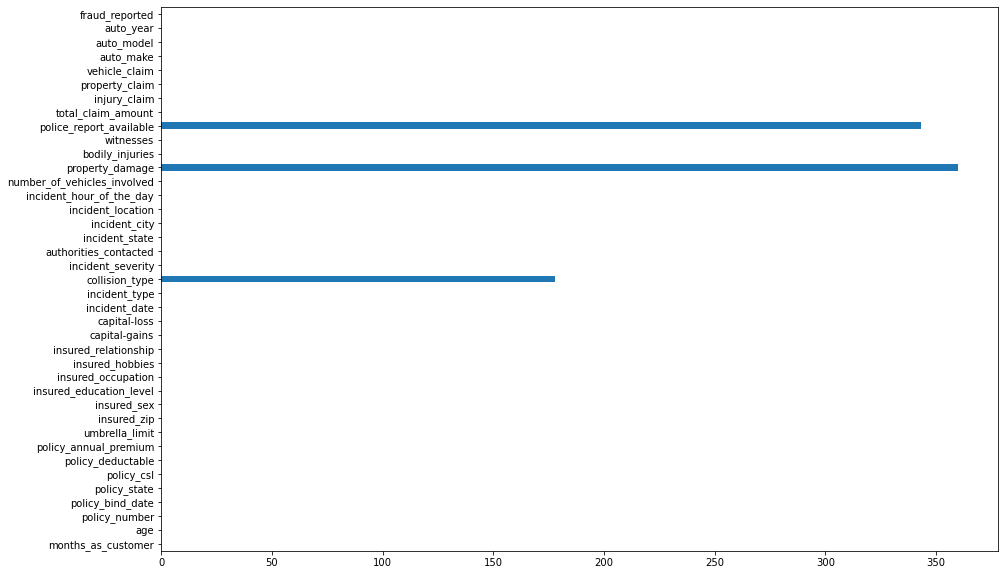

In [9]:
plt.figure(figsize=(15,10))
df.isna().sum().plot.barh()

### property_damage,police_report_available,collision_type features are having missing values to handle this problem we will use imputing techniques.


In [10]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['auto_make'] = df['auto_make'].replace("Suburu", "Subaru")

In [11]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location',
           'incident_state','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [13]:
df.head(2)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,Y


In [14]:
df.shape

(1000, 31)

### CHECKING DUPLICATES

In [15]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [months_as_customer, age, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, fraud_reported]
Index: []


## There is no duplicates present in this dataset

In [16]:
#mostly accidents are from 2015 jan and feb, so year isnt very important

df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_month']= df['incident_date'].apply(lambda dt:dt.month)
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Y,1
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,Y,1
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,N,2
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y,10
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,N,2


In [17]:
df.drop(columns=['incident_date'],inplace=True)

In [18]:
df.drop(columns=['policy_annual_premium'],inplace=True)

In [19]:
df['incident_month'].value_counts()

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

In [20]:
df.nunique()

months_as_customer             391
age                             46
policy_csl                       3
policy_deductable                3
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make                       14
fraud_reported      

In [21]:
# print all the datatypes and unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

policy_csl:['250/500' '100/300' '500/1000']
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------------------------------------------------------------------------------
insured_sex:['MALE' 'FEMALE']
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
---------------------------------------------------------------------------------
insured_education_level:['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
---------------------------------------------------------------------------------
insured_occupation:['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
machine-op-inspct   

# Exploratory Data Analysis


### Exploratory data analysis was conducted started with the dependent variable, Fraud_reported. 



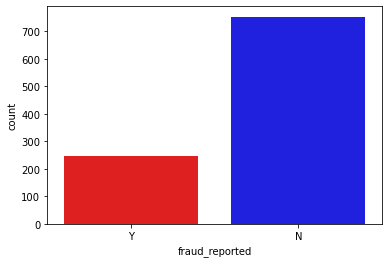

In [22]:
sns.countplot(x ="fraud_reported", data=df, palette=['r','b']);

In [23]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

### There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims.

In [24]:
categorical = df.select_dtypes(include=['object'])
categorical.head()


,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,property_damage,police_report_available,auto_make,fraud_reported
0,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,YES,YES,Saab,Y
1,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,Riverwood,NO,NO,Mercedes,Y
2,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,NO,NO,Dodge,N
3,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,NO,NO,Chevrolet,Y
4,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,Arlington,NO,NO,Accura,N


In [25]:
categorical['incident_month'] = df['incident_month']

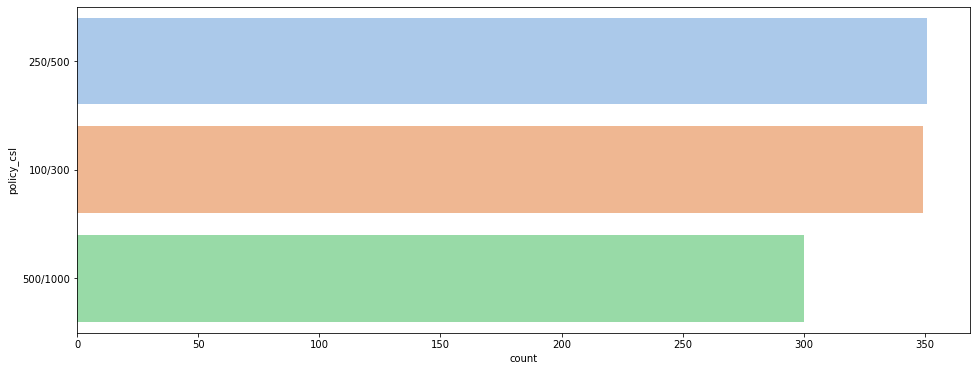

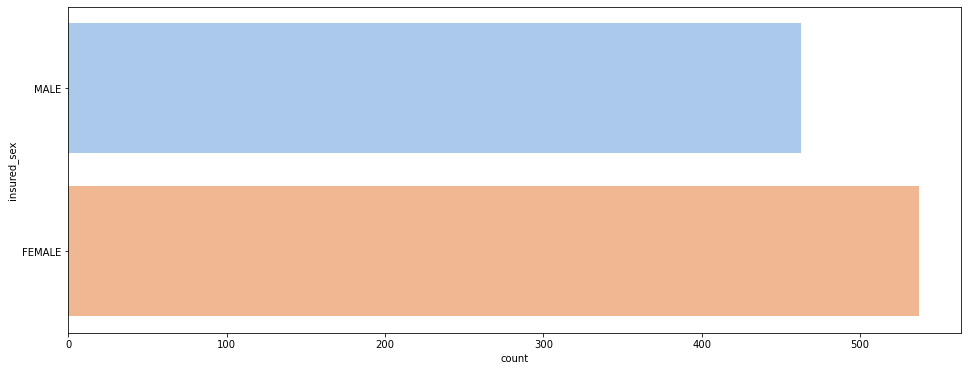

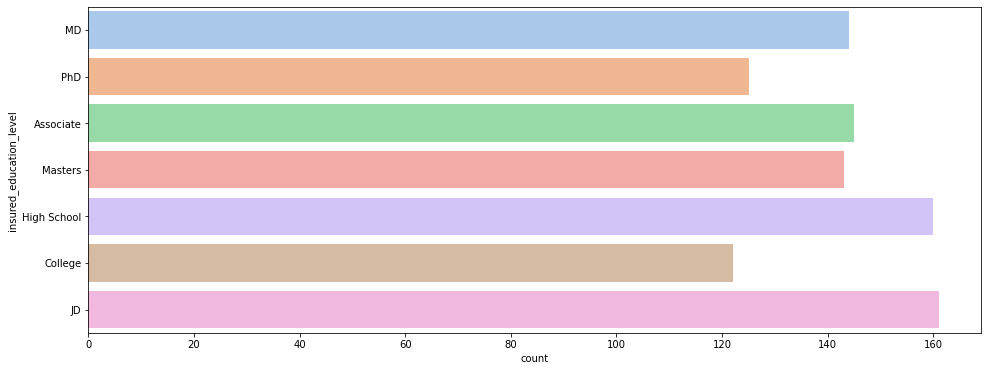

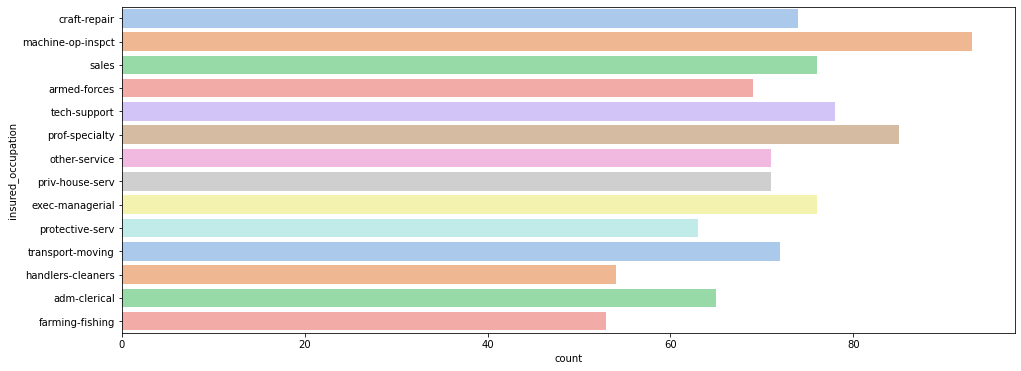

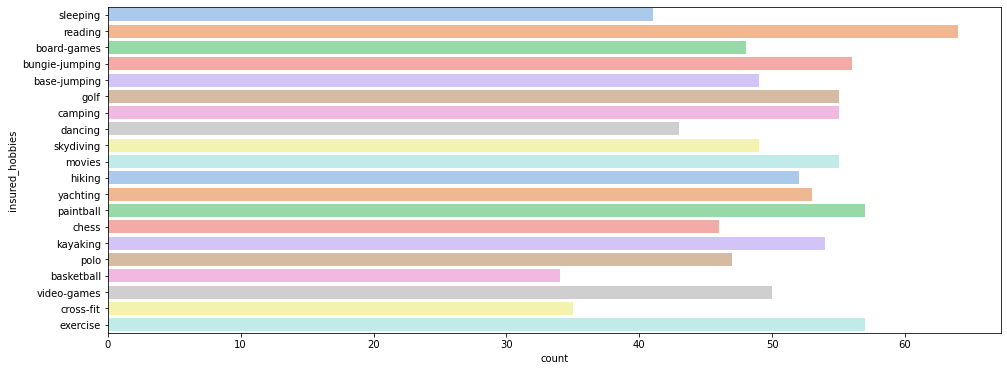

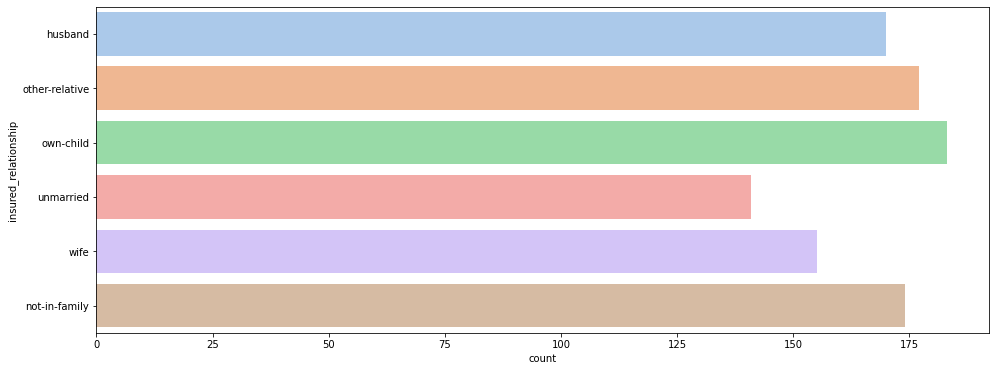

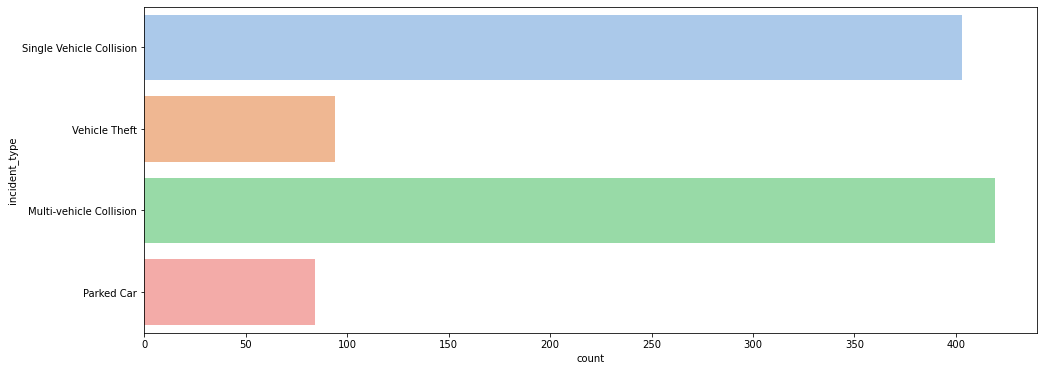

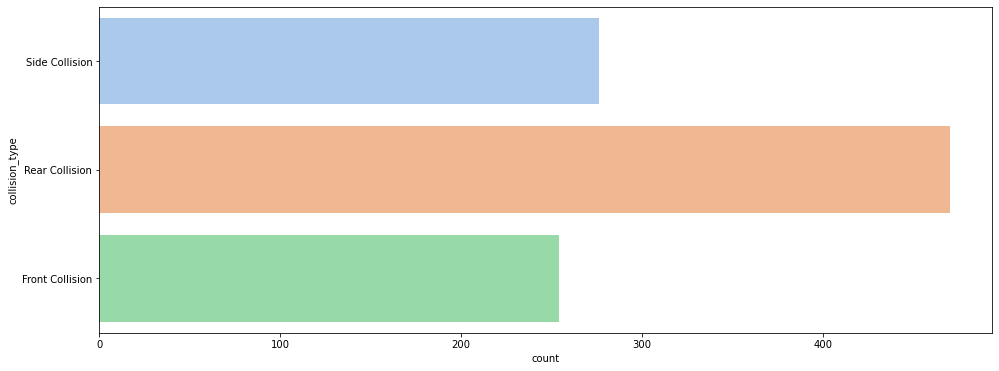

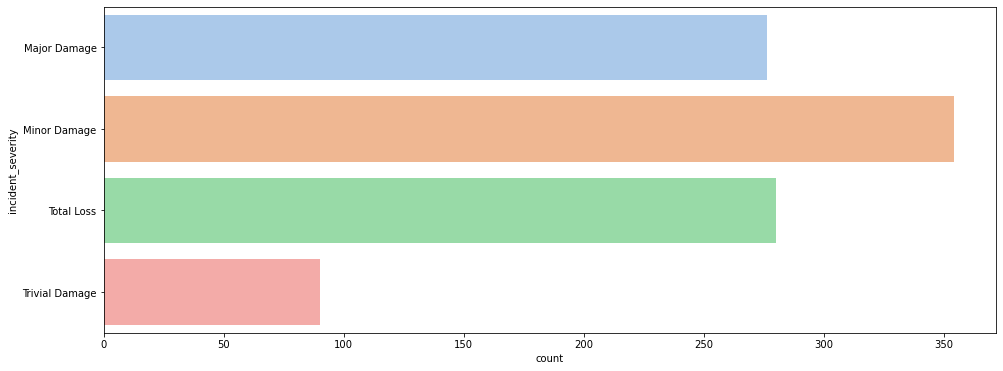

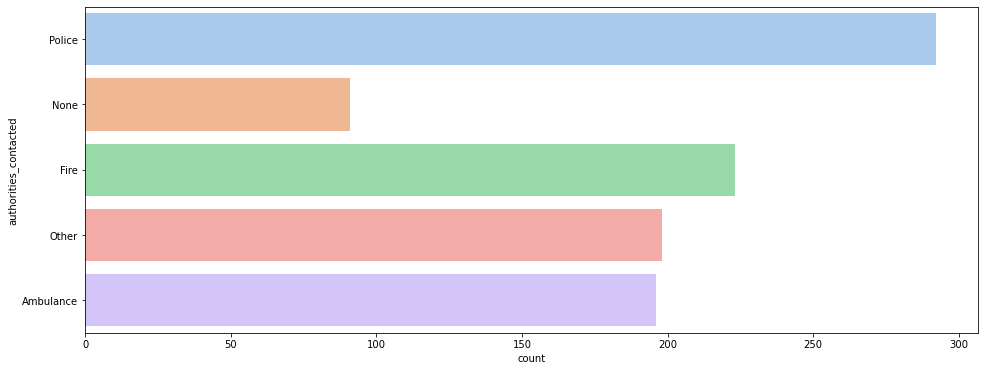

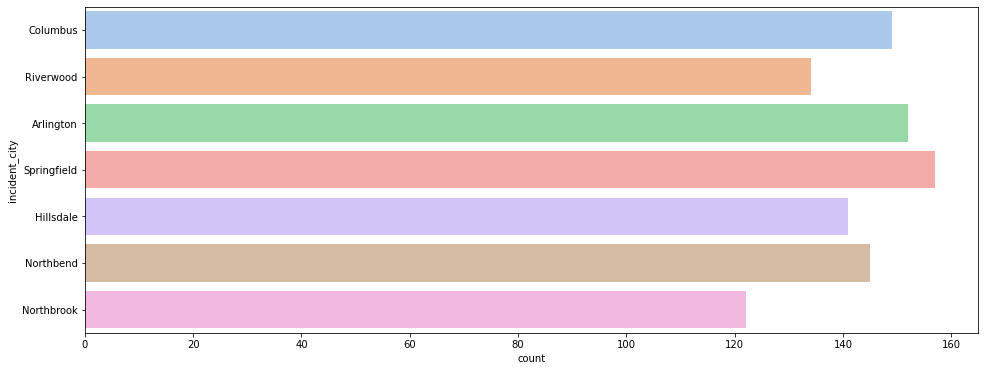

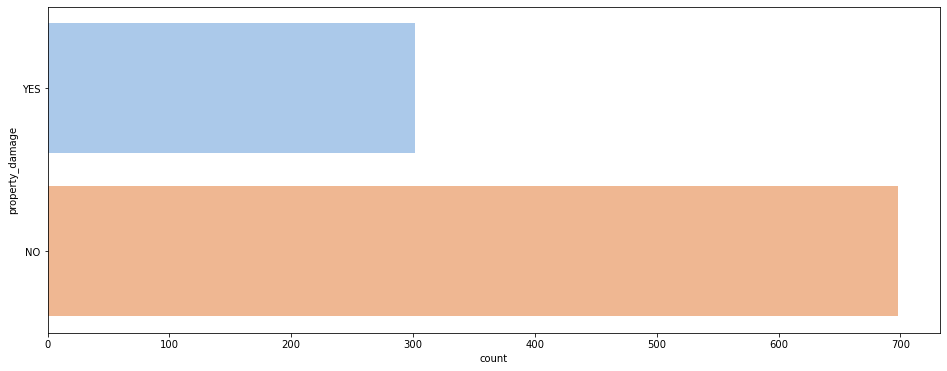

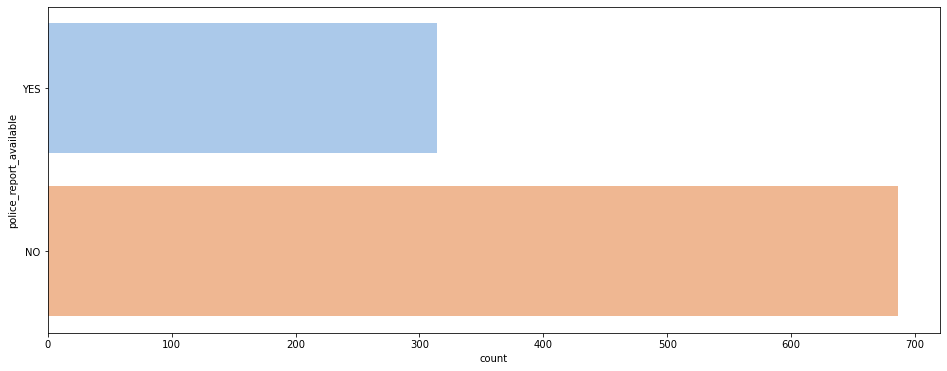

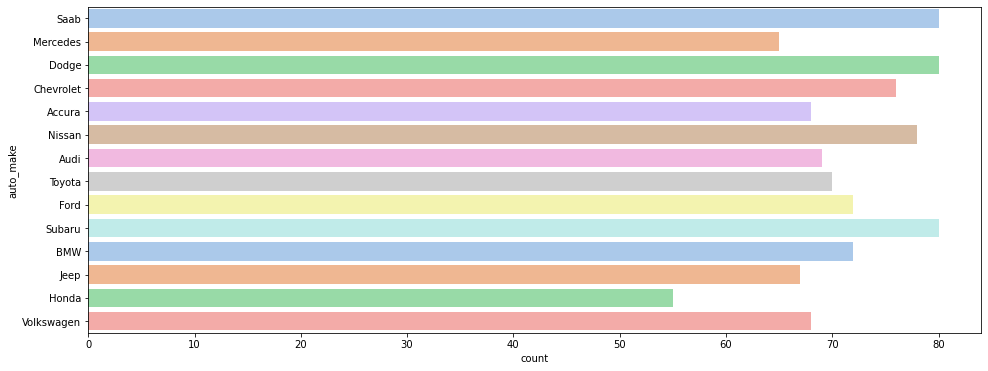

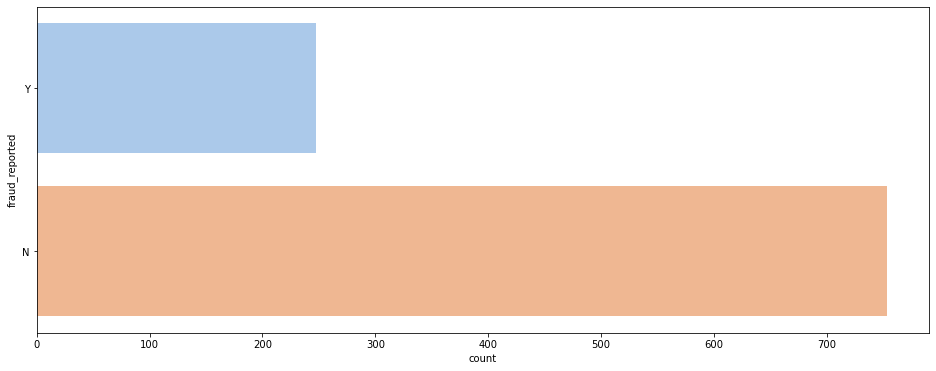

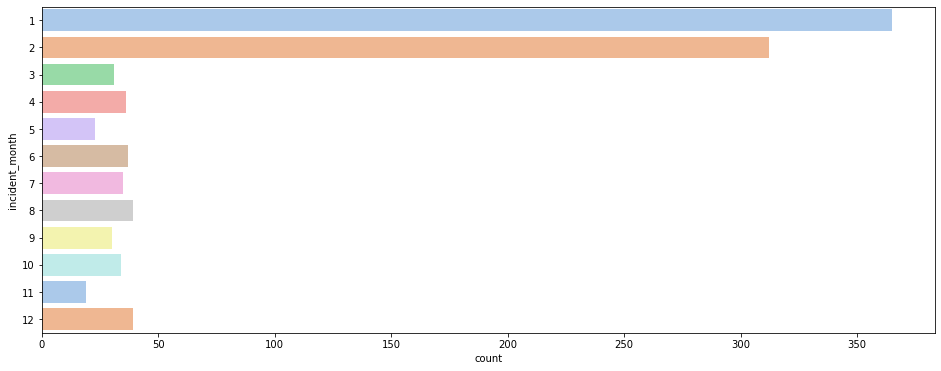

In [26]:
for i, name in enumerate(categorical):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name, data=df, palette="pastel")

## Observations:-

- Authorities_contacted: Police are the most frequently contacted followed by the police.
- Auto_make: apart from Honda (least), most are relatively even.
- Collision_type: the distribution looks evenly spread across the categories. Most are rear collisions. Smallest groups are the Front collision 
- Incident_city: relatively even with Springfield and Arlington being the highest.
- Incident_type: very few incidents are by theft/parked car. Most are by multivehicle collision and single vehicle collisio


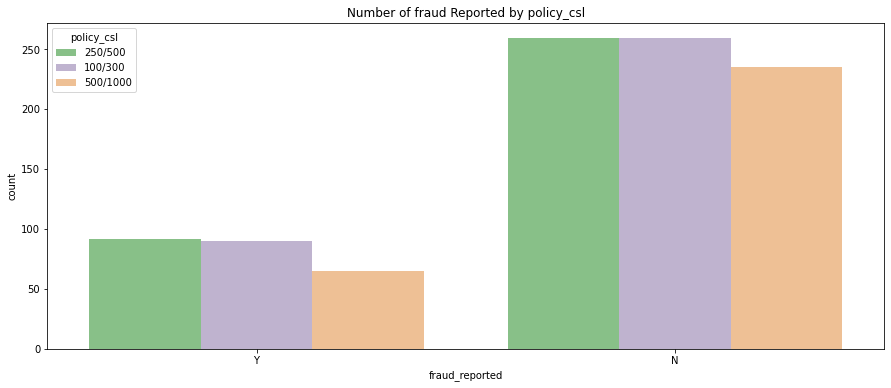

In [27]:
#let's visualize the relationship between policy_csl and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='policy_csl',data=df, palette = 'Accent').set_title("Number of fraud Reported by policy_csl")
plt.show()

In [28]:
df.groupby('fraud_reported')['policy_csl'].value_counts()


fraud_reported  policy_csl
N               100/300       259
                250/500       259
                500/1000      235
Y               250/500        92
                100/300        90
                500/1000       65
Name: policy_csl, dtype: int64

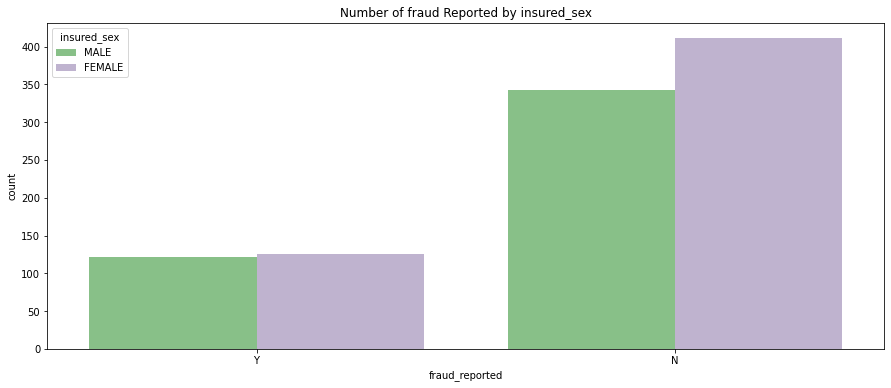

In [30]:
#let's visualize the relationship between insured_sex and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='insured_sex',data=df, palette = 'Accent').set_title("Number of fraud Reported by insured_sex")
plt.show()

In [31]:
df.groupby('fraud_reported')['insured_sex'].value_counts()


fraud_reported  insured_sex
N               FEMALE         411
                MALE           342
Y               FEMALE         126
                MALE           121
Name: insured_sex, dtype: int64

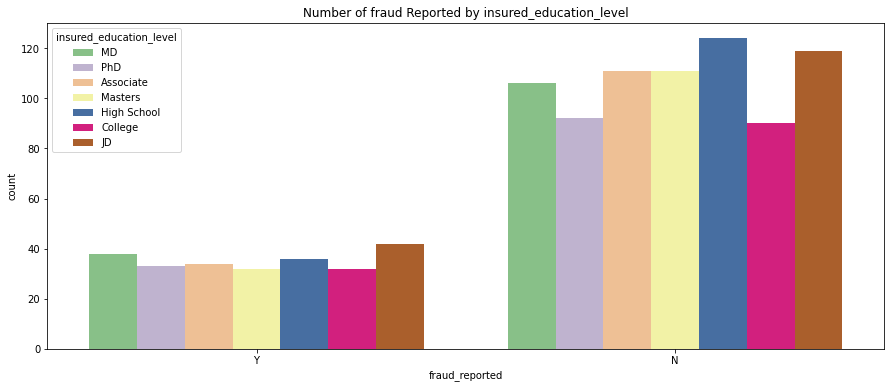

In [32]:
#let's visualize the relationship between insured_education_level and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='insured_education_level',data=df, palette = 'Accent').set_title("Number of fraud Reported by insured_education_level")
plt.show()

In [33]:
df.groupby('fraud_reported')['insured_education_level'].value_counts()

fraud_reported  insured_education_level
N               High School                124
                JD                         119
                Associate                  111
                Masters                    111
                MD                         106
                PhD                         92
                College                     90
Y               JD                          42
                MD                          38
                High School                 36
                Associate                   34
                PhD                         33
                College                     32
                Masters                     32
Name: insured_education_level, dtype: int64

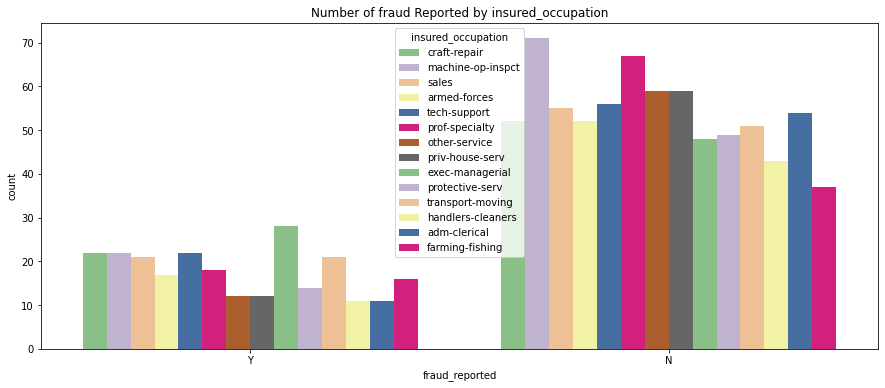

In [34]:
#let's visualize the relationship between insured_occupation and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='insured_occupation',data=df, palette = 'Accent').set_title("Number of fraud Reported by insured_occupation")
plt.show()

In [35]:
df.groupby('fraud_reported')['insured_occupation'].value_counts()

fraud_reported  insured_occupation
N               machine-op-inspct     71
                prof-specialty        67
                other-service         59
                priv-house-serv       59
                tech-support          56
                sales                 55
                adm-clerical          54
                armed-forces          52
                craft-repair          52
                transport-moving      51
                protective-serv       49
                exec-managerial       48
                handlers-cleaners     43
                farming-fishing       37
Y               exec-managerial       28
                craft-repair          22
                machine-op-inspct     22
                tech-support          22
                sales                 21
                transport-moving      21
                prof-specialty        18
                armed-forces          17
                farming-fishing       16
                protec

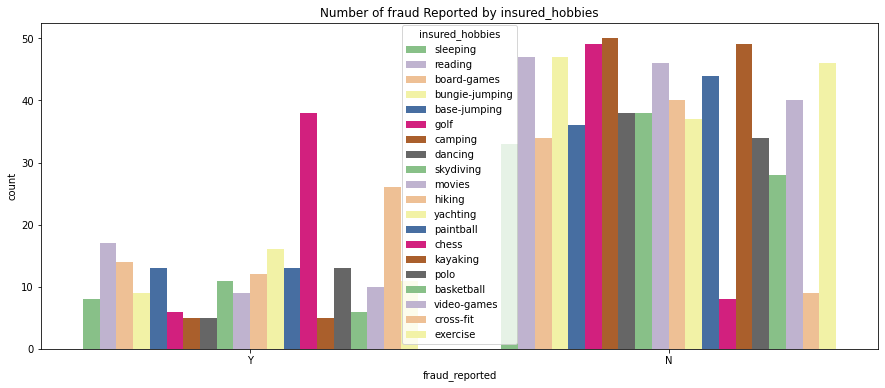

In [36]:
#let's visualize the relationship between insured_hobbies and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='insured_hobbies',data=df, palette = 'Accent').set_title("Number of fraud Reported by insured_hobbies")
plt.show()

In [37]:
df.groupby('fraud_reported')['insured_hobbies'].value_counts()

fraud_reported  insured_hobbies
N               camping            50
                golf               49
                kayaking           49
                bungie-jumping     47
                reading            47
                exercise           46
                movies             46
                paintball          44
                hiking             40
                video-games        40
                dancing            38
                skydiving          38
                yachting           37
                base-jumping       36
                board-games        34
                polo               34
                sleeping           33
                basketball         28
                cross-fit           9
                chess               8
Y               chess              38
                cross-fit          26
                reading            17
                yachting           16
                board-games        14
                ba

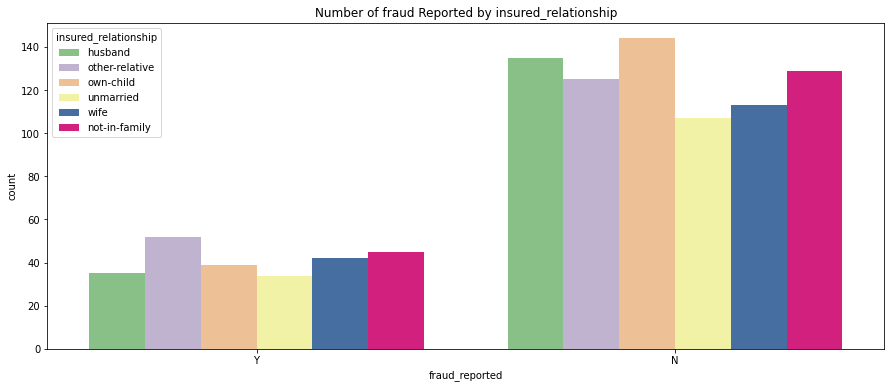

In [38]:
#let's visualize the relationship between insured_relationship and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='insured_relationship',data=df, palette = 'Accent').set_title("Number of fraud Reported by insured_relationship")
plt.show()

In [39]:
df.groupby('fraud_reported')['insured_relationship'].value_counts()

fraud_reported  insured_relationship
N               own-child               144
                husband                 135
                not-in-family           129
                other-relative          125
                wife                    113
                unmarried               107
Y               other-relative           52
                not-in-family            45
                wife                     42
                own-child                39
                husband                  35
                unmarried                34
Name: insured_relationship, dtype: int64

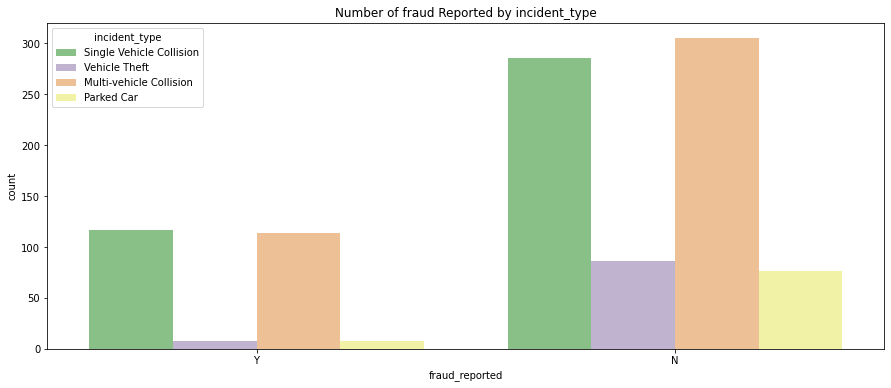

In [40]:
#let's visualize the relationship between incident_type and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='incident_type',data=df, palette = 'Accent').set_title("Number of fraud Reported by incident_type")
plt.show()

In [41]:
df.groupby('fraud_reported')['incident_type'].value_counts()

fraud_reported  incident_type           
N               Multi-vehicle Collision     305
                Single Vehicle Collision    286
                Vehicle Theft                86
                Parked Car                   76
Y               Single Vehicle Collision    117
                Multi-vehicle Collision     114
                Parked Car                    8
                Vehicle Theft                 8
Name: incident_type, dtype: int64

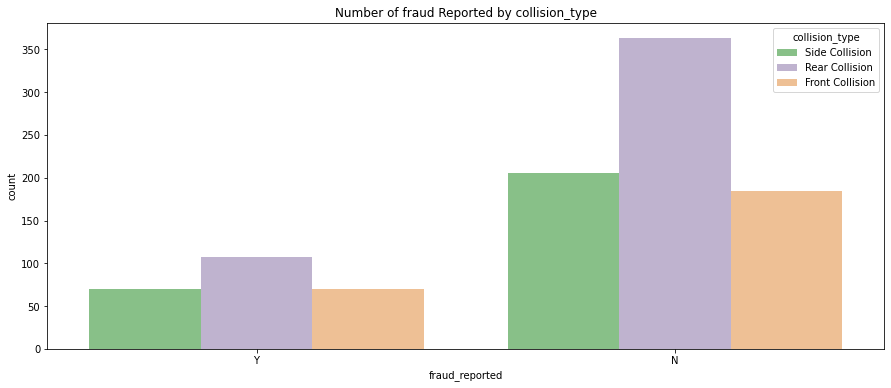

In [42]:
#let's visualize the relationship between collision_type and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='collision_type',data=df, palette = 'Accent').set_title("Number of fraud Reported by collision_type")
plt.show()

In [43]:
df.groupby('fraud_reported')['collision_type'].value_counts()

fraud_reported  collision_type 
N               Rear Collision     363
                Side Collision     206
                Front Collision    184
Y               Rear Collision     107
                Front Collision     70
                Side Collision      70
Name: collision_type, dtype: int64

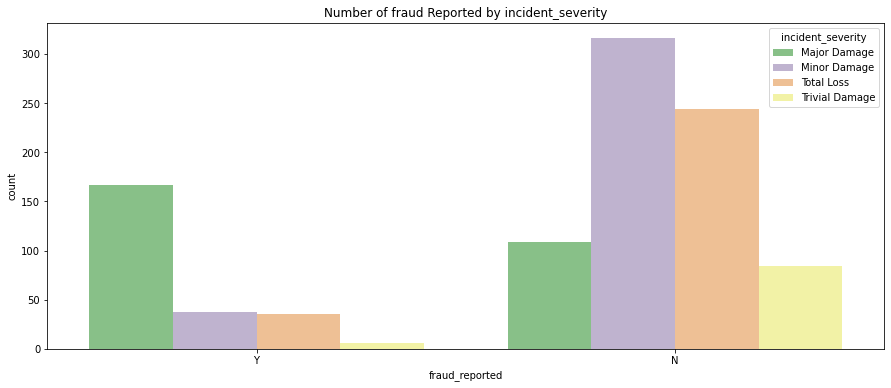

In [44]:
#let's visualize the relationship between incident_severity and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='incident_severity',data=df, palette = 'Accent').set_title("Number of fraud Reported by incident_severity")
plt.show()

In [45]:
df.groupby('fraud_reported')['incident_severity'].value_counts()

fraud_reported  incident_severity
N               Minor Damage         316
                Total Loss           244
                Major Damage         109
                Trivial Damage        84
Y               Major Damage         167
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: incident_severity, dtype: int64

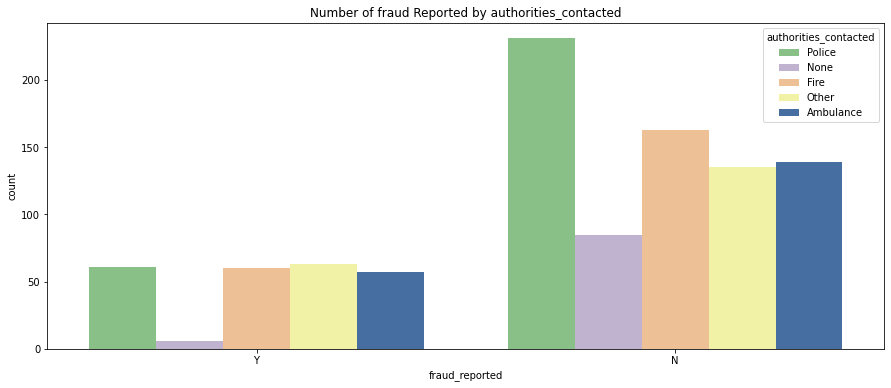

In [46]:
#let's visualize the relationship between authorities_contacted and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='authorities_contacted',data=df, palette = 'Accent').set_title("Number of fraud Reported by authorities_contacted")
plt.show()

In [47]:
df.groupby('fraud_reported')['authorities_contacted'].value_counts()

fraud_reported  authorities_contacted
N               Police                   231
                Fire                     163
                Ambulance                139
                Other                    135
                None                      85
Y               Other                     63
                Police                    61
                Fire                      60
                Ambulance                 57
                None                       6
Name: authorities_contacted, dtype: int64

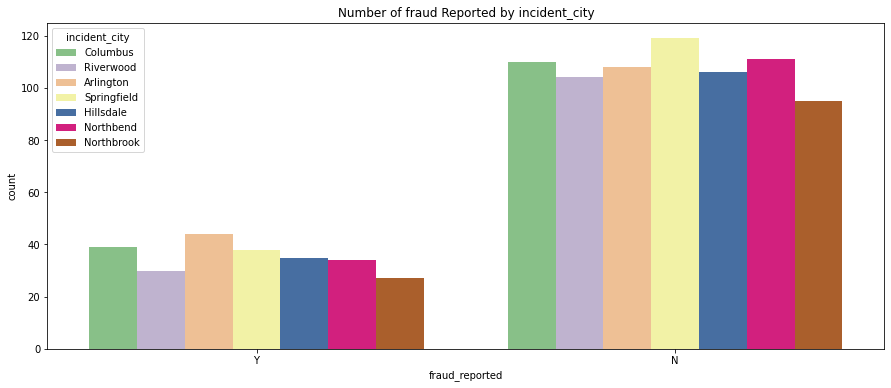

In [48]:
#let's visualize the relationship between incident_city and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='incident_city',data=df, palette = 'Accent').set_title("Number of fraud Reported by incident_city")
plt.show()

In [49]:
df.groupby('fraud_reported')['incident_city'].value_counts()

fraud_reported  incident_city
N               Springfield      119
                Northbend        111
                Columbus         110
                Arlington        108
                Hillsdale        106
                Riverwood        104
                Northbrook        95
Y               Arlington         44
                Columbus          39
                Springfield       38
                Hillsdale         35
                Northbend         34
                Riverwood         30
                Northbrook        27
Name: incident_city, dtype: int64

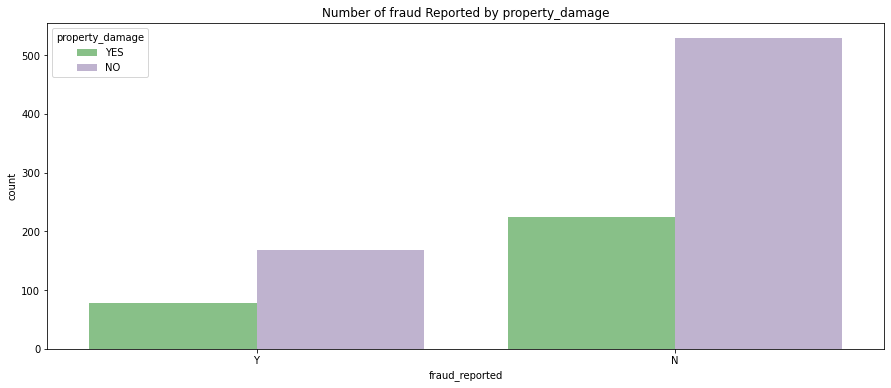

In [50]:
#let's visualize the relationship between property_damage and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='property_damage',data=df, palette = 'Accent').set_title("Number of fraud Reported by property_damage")
plt.show()

In [51]:
df.groupby('fraud_reported')['property_damage'].value_counts()

fraud_reported  property_damage
N               NO                 529
                YES                224
Y               NO                 169
                YES                 78
Name: property_damage, dtype: int64

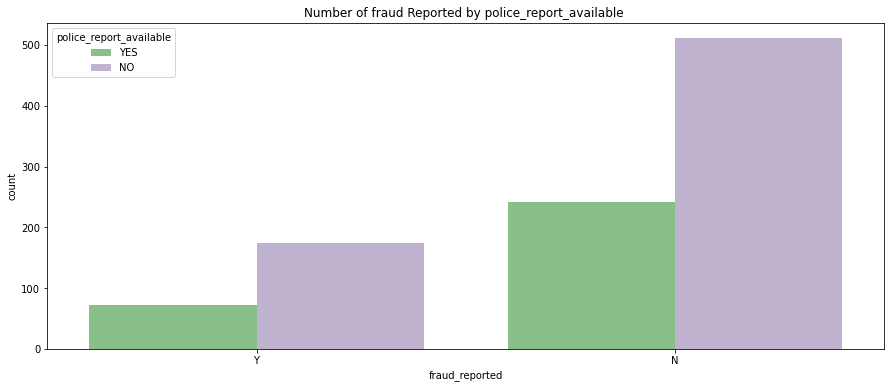

In [56]:
#let's visualize the relationship between police_report_available and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='police_report_available',data=df, palette = 'Accent').set_title("Number of fraud Reported by police_report_available ")
plt.show()

In [57]:
df.groupby('fraud_reported')['police_report_available'].value_counts()

fraud_reported  police_report_available
N               NO                         511
                YES                        242
Y               NO                         175
                YES                         72
Name: police_report_available, dtype: int64

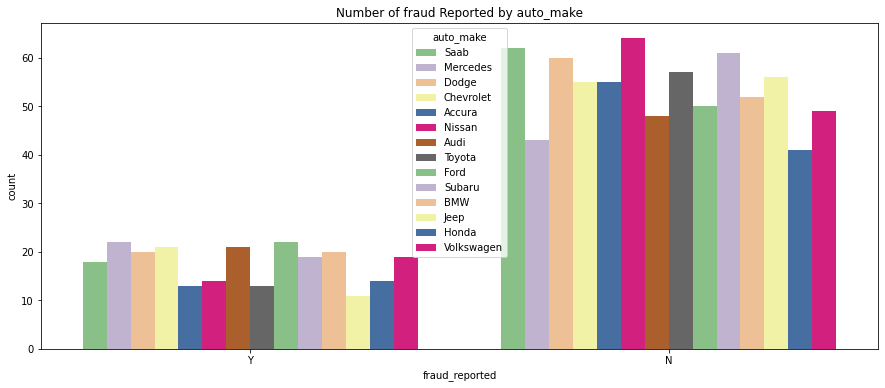

In [58]:
#let's visualize the relationship between auto_make and fraud_reported
plt.figure(figsize=(15,6))
sns.countplot(x=df['fraud_reported'],hue='auto_make',data=df, palette = 'Accent').set_title("Number of fraud Reported by auto_make")
plt.show()

In [59]:
df.groupby('fraud_reported')['auto_make'].value_counts()

fraud_reported  auto_make 
N               Nissan        64
                Saab          62
                Subaru        61
                Dodge         60
                Toyota        57
                Jeep          56
                Accura        55
                Chevrolet     55
                BMW           52
                Ford          50
                Volkswagen    49
                Audi          48
                Mercedes      43
                Honda         41
Y               Ford          22
                Mercedes      22
                Audi          21
                Chevrolet     21
                BMW           20
                Dodge         20
                Subaru        19
                Volkswagen    19
                Saab          18
                Honda         14
                Nissan        14
                Accura        13
                Toyota        13
                Jeep          11
Name: auto_make, dtype: int64

In [60]:
cont = df.select_dtypes(include=['int'])
cont.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,incident_month
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080,1
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510,1
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,10
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2


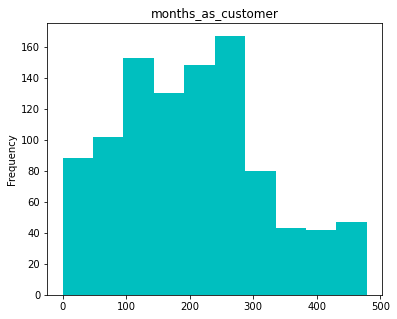

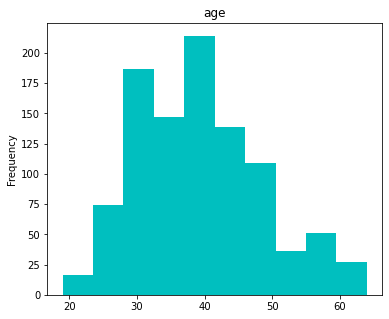

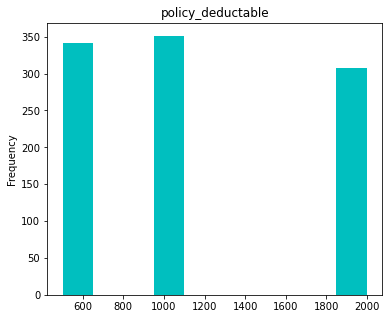

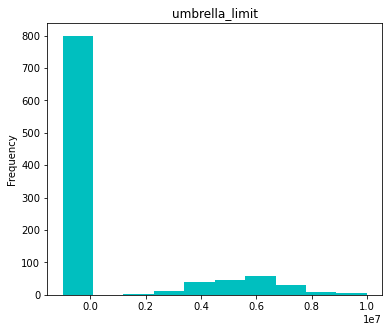

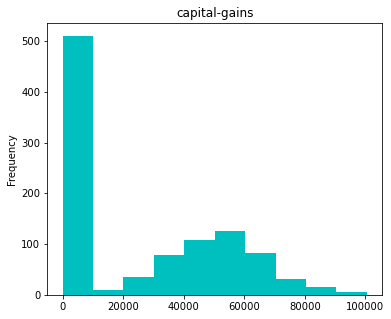

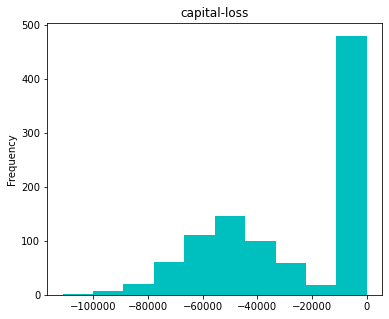

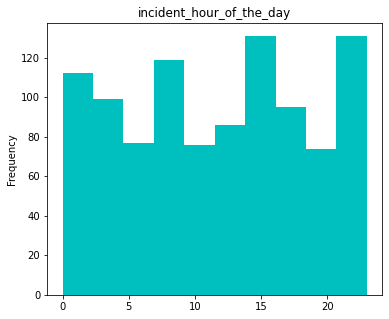

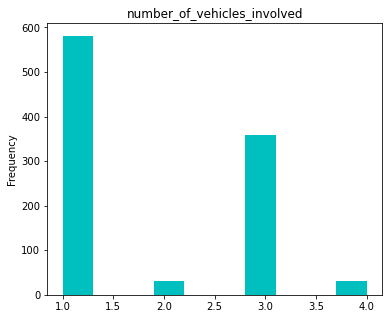

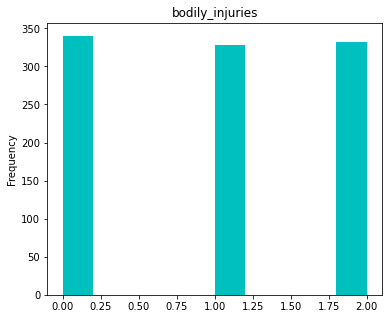

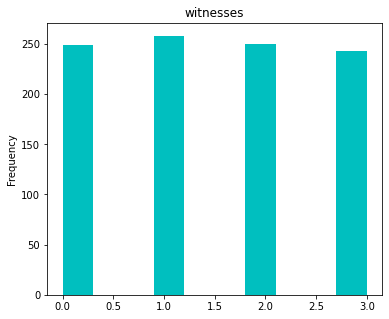

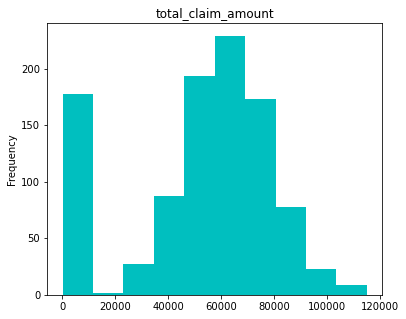

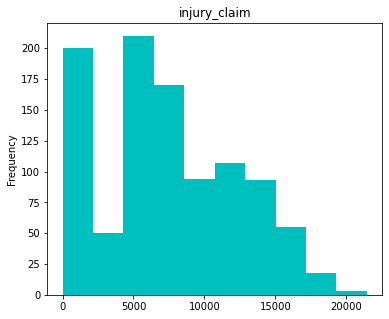

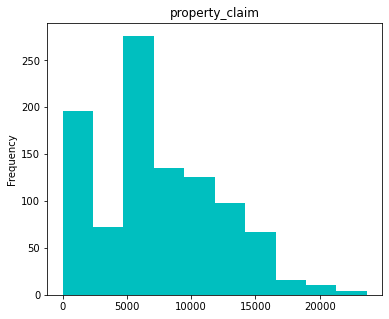

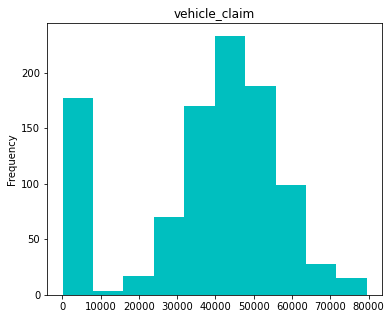

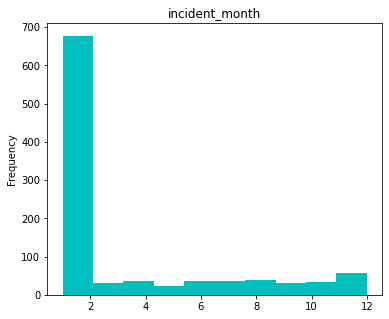

In [65]:
#distribution of continuous variables

for i, name in enumerate(cont):
    plt.figure(i,figsize=(6,5))
    df[name].plot(kind="hist", color="c", title=name)

## Observations:-

- capital gain and loss: are mostly 0
- age: most of the peoples age is 30 to 45
- vehicle _claim: most of the vehicle_claims are 35000 to 55000
- property_claims: most of the property_claims are 5000 to 10000

<Figure size 864x360 with 0 Axes>

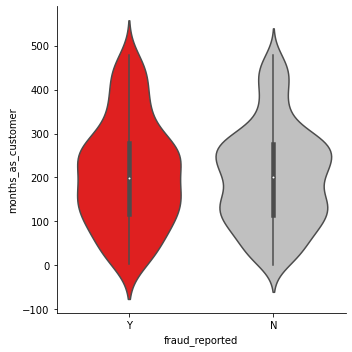

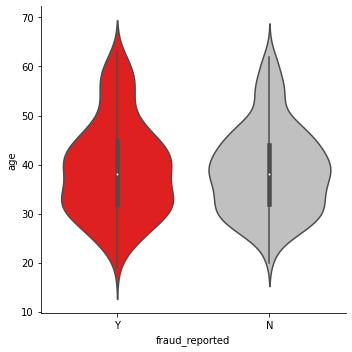

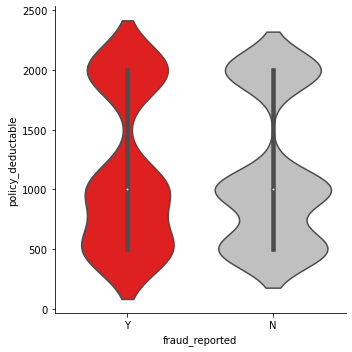

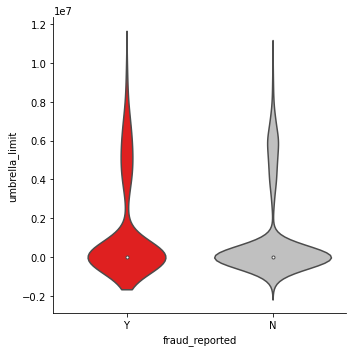

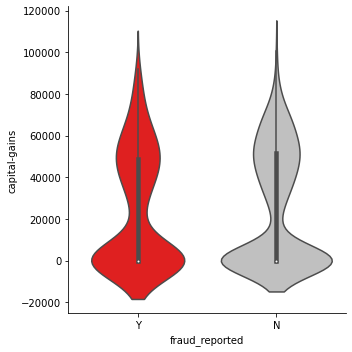

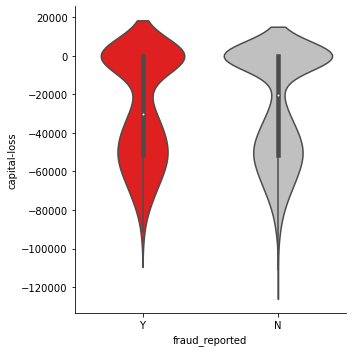

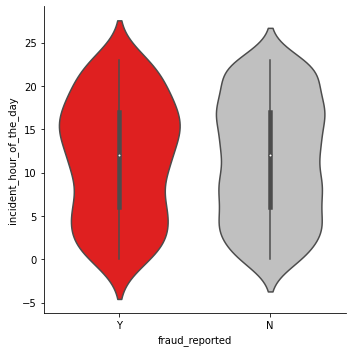

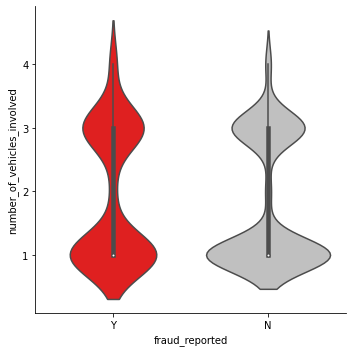

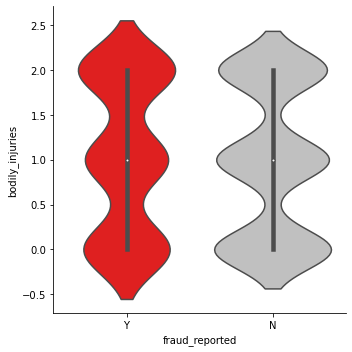

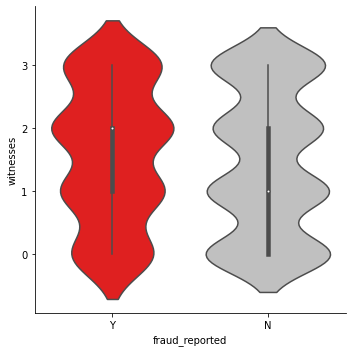

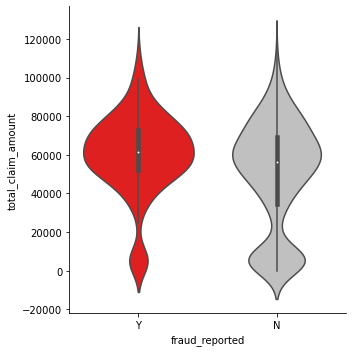

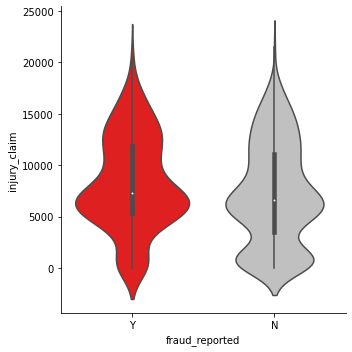

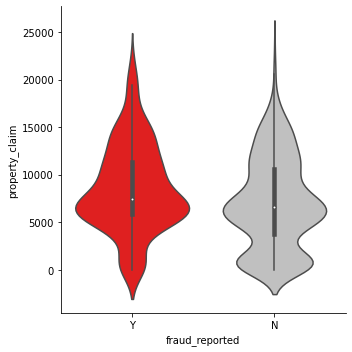

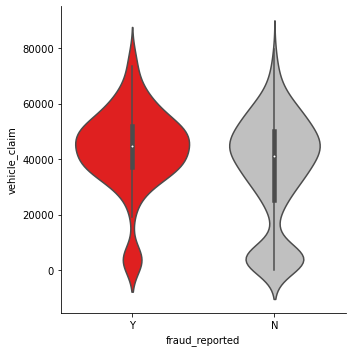

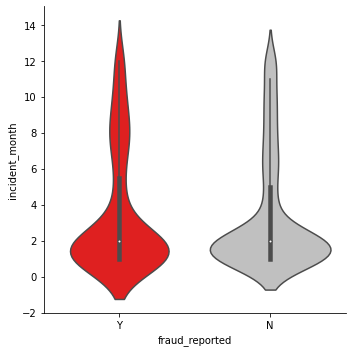

In [31]:
#each continous var and fraud reported's dist

for i, name in enumerate(cont):
    plt.figure(i,figsize=(12,5))
    sns.catplot(data=df, x="fraud_reported", y=name, kind='violin', palette=['red','silver'])


## Observations

- Little have I suspected that fraud differed across hobbies. It seems like chess players and cross-fitters have higher tendencies of fraud.
- Major incident severity seems to have highest fraud cases that exceed non fraud cases.
- capital gain and loss: are mostly 0
- total_claim_amount: range 55000 to 65000
- vehicle _claim: most of the vehicle_claims are 40000 to 50000
- property_claims: most of the property_claims are 5000 to 10000
- incident_months: most of the incidents are happened in jan and feb

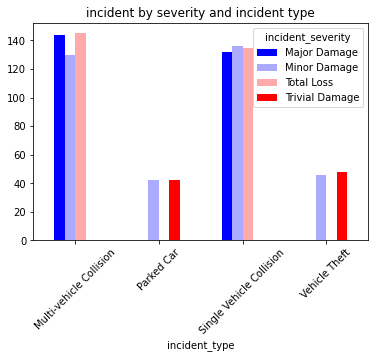

In [67]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");


### More severe accidents seem to only be present with collision.

Text(0.5, 1.0, 'incident by severity and collision type')

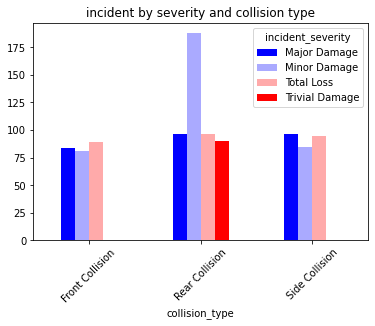

In [33]:
incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type")


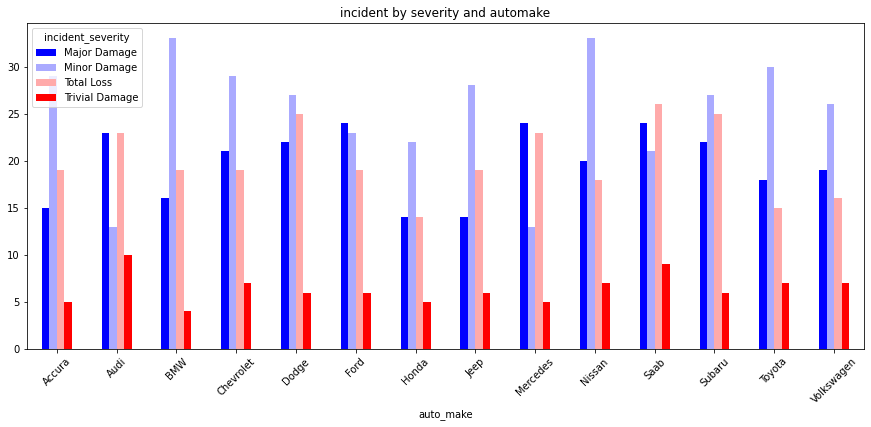

In [34]:
incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");


### Seems like bmw and nissan gets a lot of minor accident Fiercer cars like dodge, subaru, saab, mercedes get into more severe accident

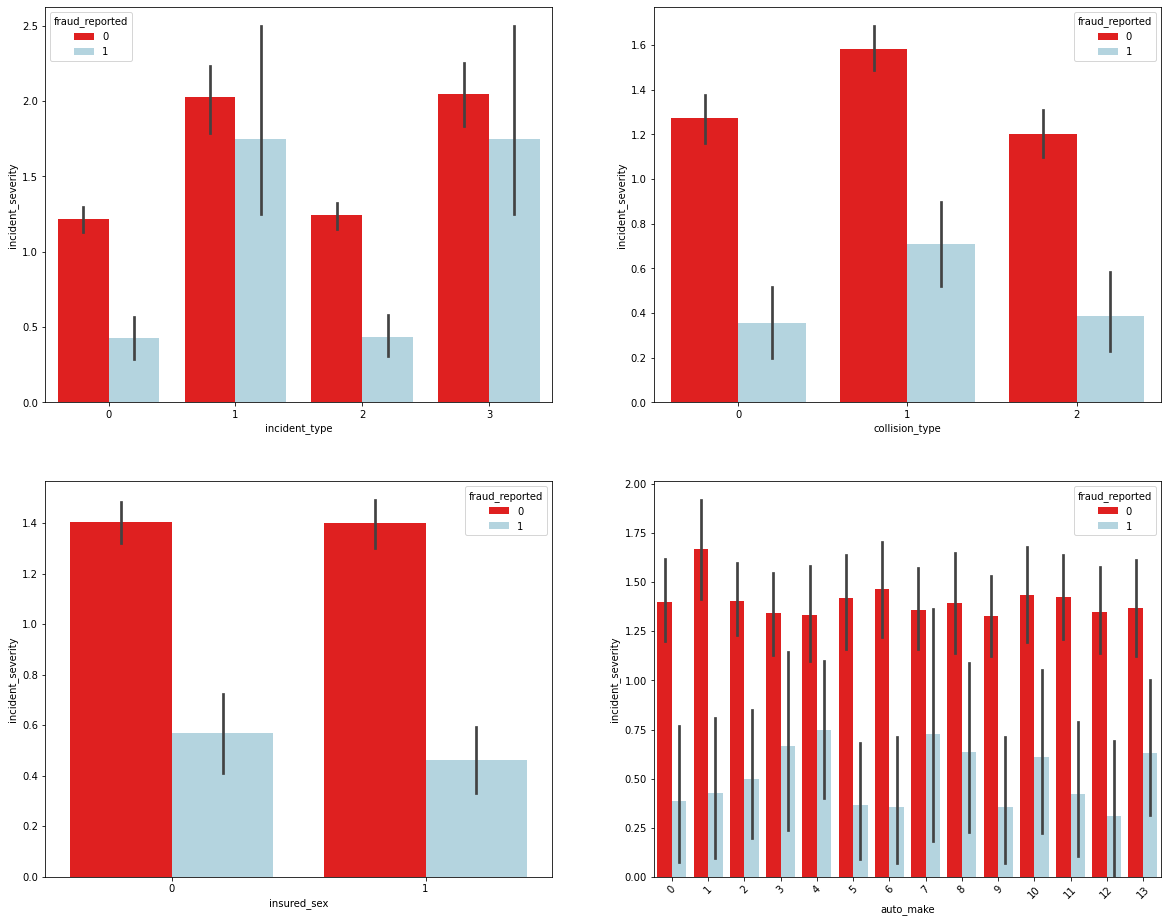

In [37]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][1]);

plt.xticks(rotation=45);


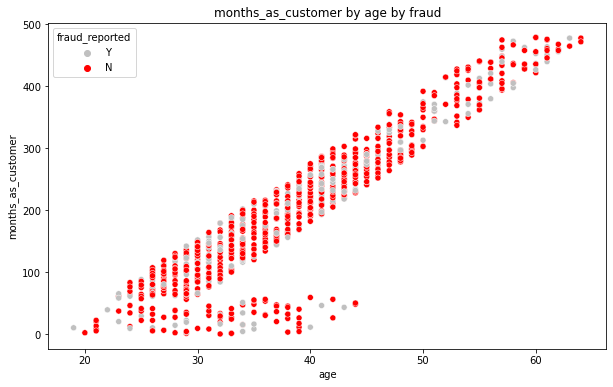

In [75]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("months_as_customer by age by fraud");


#### I tried to see if there are any interactions between months as customer and age on fraud but there don’t seem to be. From the graph we can see that a group of people across age are relatively new insurance customers while the rest are drivers that have insurance over the years.



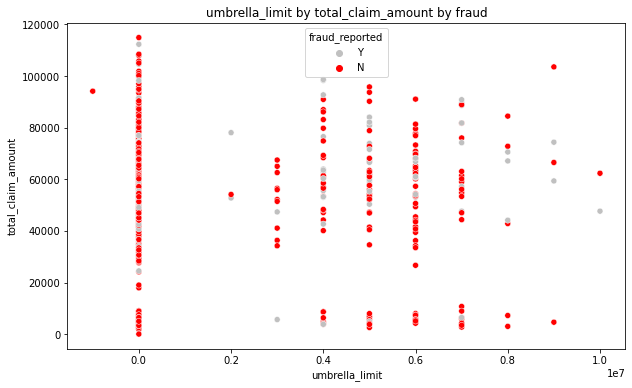

In [76]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud");


#### When I plotted seems like no umbrella limit with total claim amount, I noticed that those without umbrella limit have more density of fraud? This people may have little to lose which is why they don't purchase umbrella. Inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud.



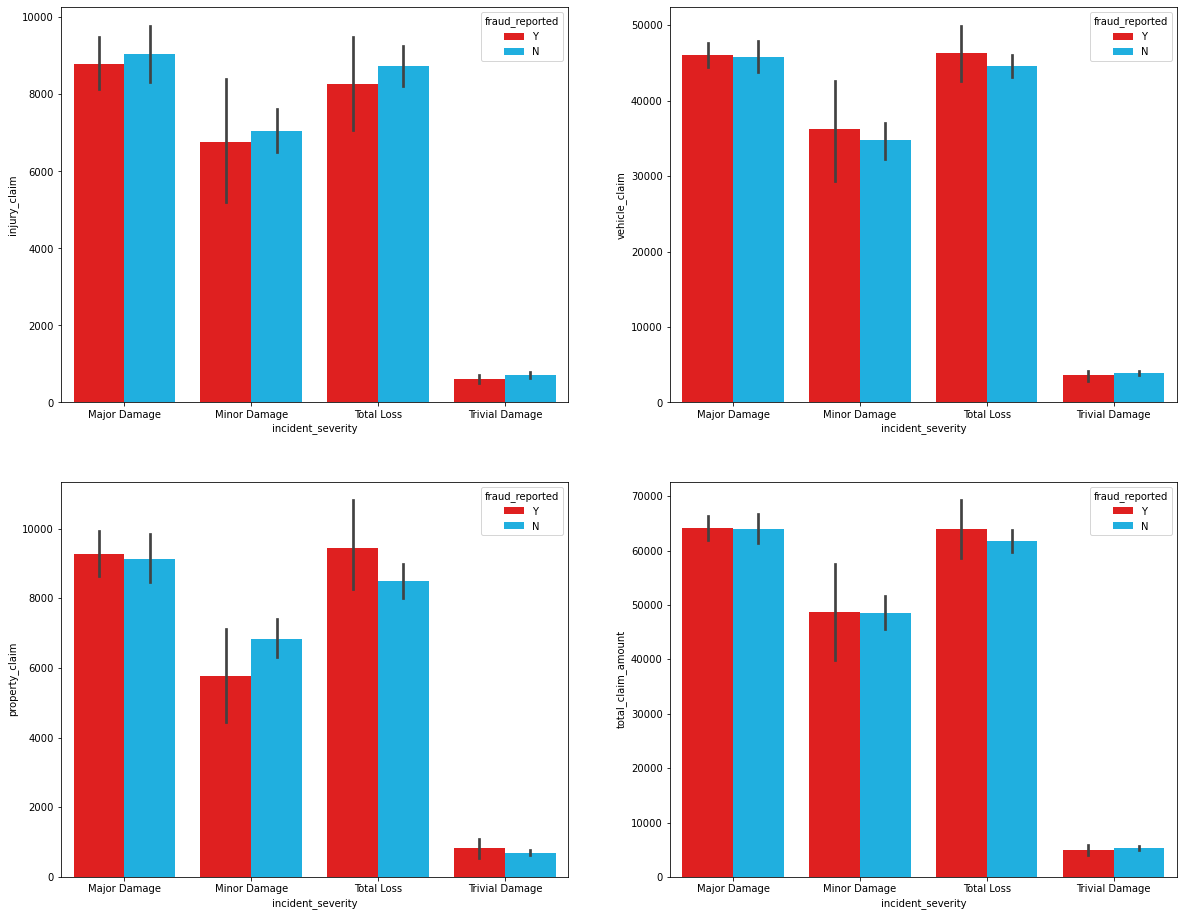

In [77]:
fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][1]);


### Next, I looked at different types of claims and incident severity and frauds. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness.



In [78]:
df['fraud_reported']=df['fraud_reported'].replace({'Y':1,'N':0})


In [79]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month
0,328,48,250/500,1000,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,1,1
1,228,42,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,1,1
2,134,29,100/300,2000,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,0,2
3,256,41,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,1,10
4,228,44,500/1000,1000,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,0,2


In [80]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [81]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month
0,328,48,1,1000,0,1,4,2,17,0,53300,0,2,2,0,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,2000,5000000,1,4,6,15,2,0,0,3,1,1,4,5,8,1,0,0,0,0,5070,780,780,3510,8,1,1
2,134,29,0,2000,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,7,3,0,2,3,0,34650,7700,3850,23100,4,0,2
3,256,41,1,2000,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,0,5,1,0,1,2,0,63400,6340,6340,50720,3,1,10
4,228,44,2,1000,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,0,20,1,0,0,1,0,6500,1300,650,4550,0,0,2


In [82]:
df.shape

(1000, 30)

In [83]:
# stats about data
df.describe()

,months_as_customer,age,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.951000,1136.000000,1.101000e+06,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.022000,1.184000,2.167000,2.966000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,0.247000,3.407000
std,115.113174,9.140287,0.804516,611.864673,2.297407e+06,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,0.728043,0.939695,1.532142,2.044266,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,0.431483,3.276291
min,0.000000,19.000000,0.000000,500.000000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1.000000
25%,115.750000,32.000000,0.000000,500.000000,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,0.000000,1.000000
50%,199.500000,38.000000,1.000000,1000.000000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,3.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,0.000000,2.000000
75%,276.250000,44.000000,2.000000,2000.000000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,0.000000,5.000000
max,479.000000,64.000000,2.000000,2000.000000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,1.000000,12.000000


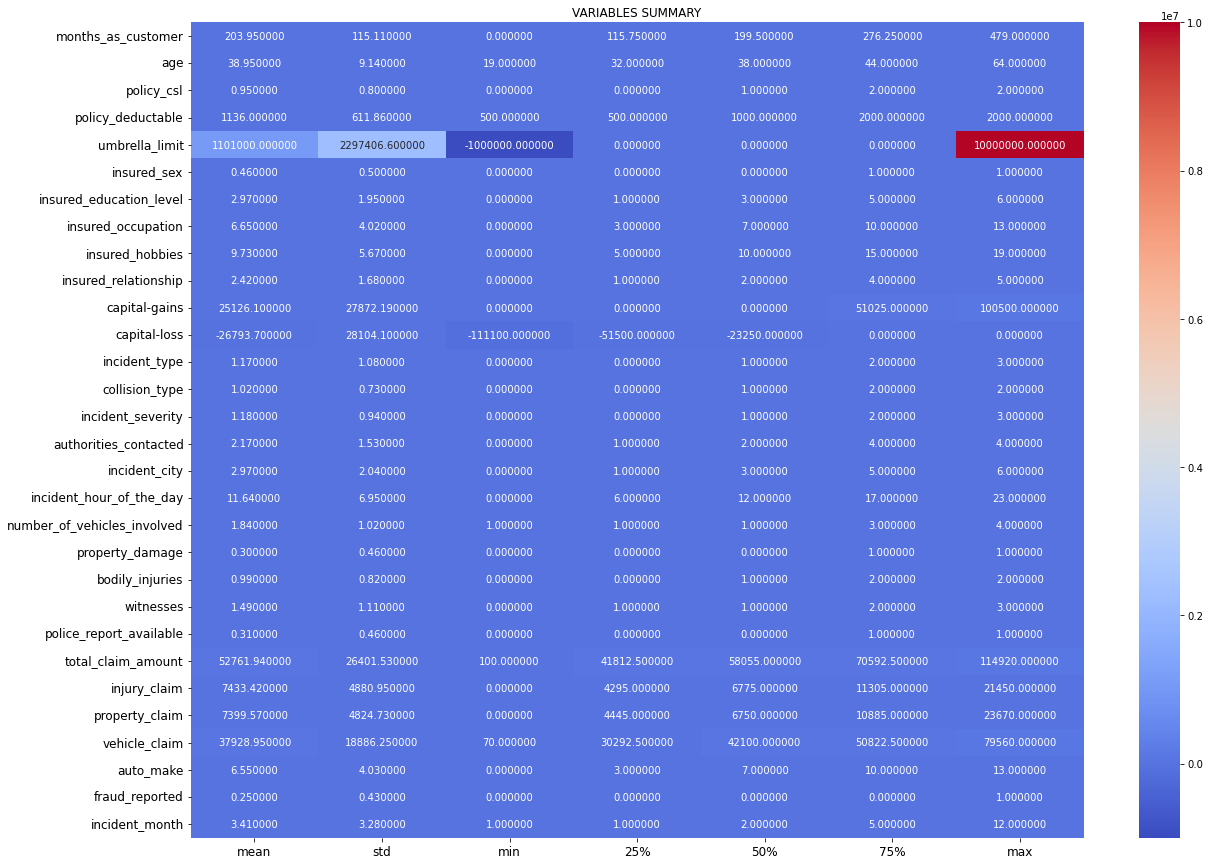

In [84]:
df.describe()
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- In variable summery umbrella_limit is indicating the presence of outliers
- most of the are having categorical values in this dataset


## Normal Distribution curve for every individual column


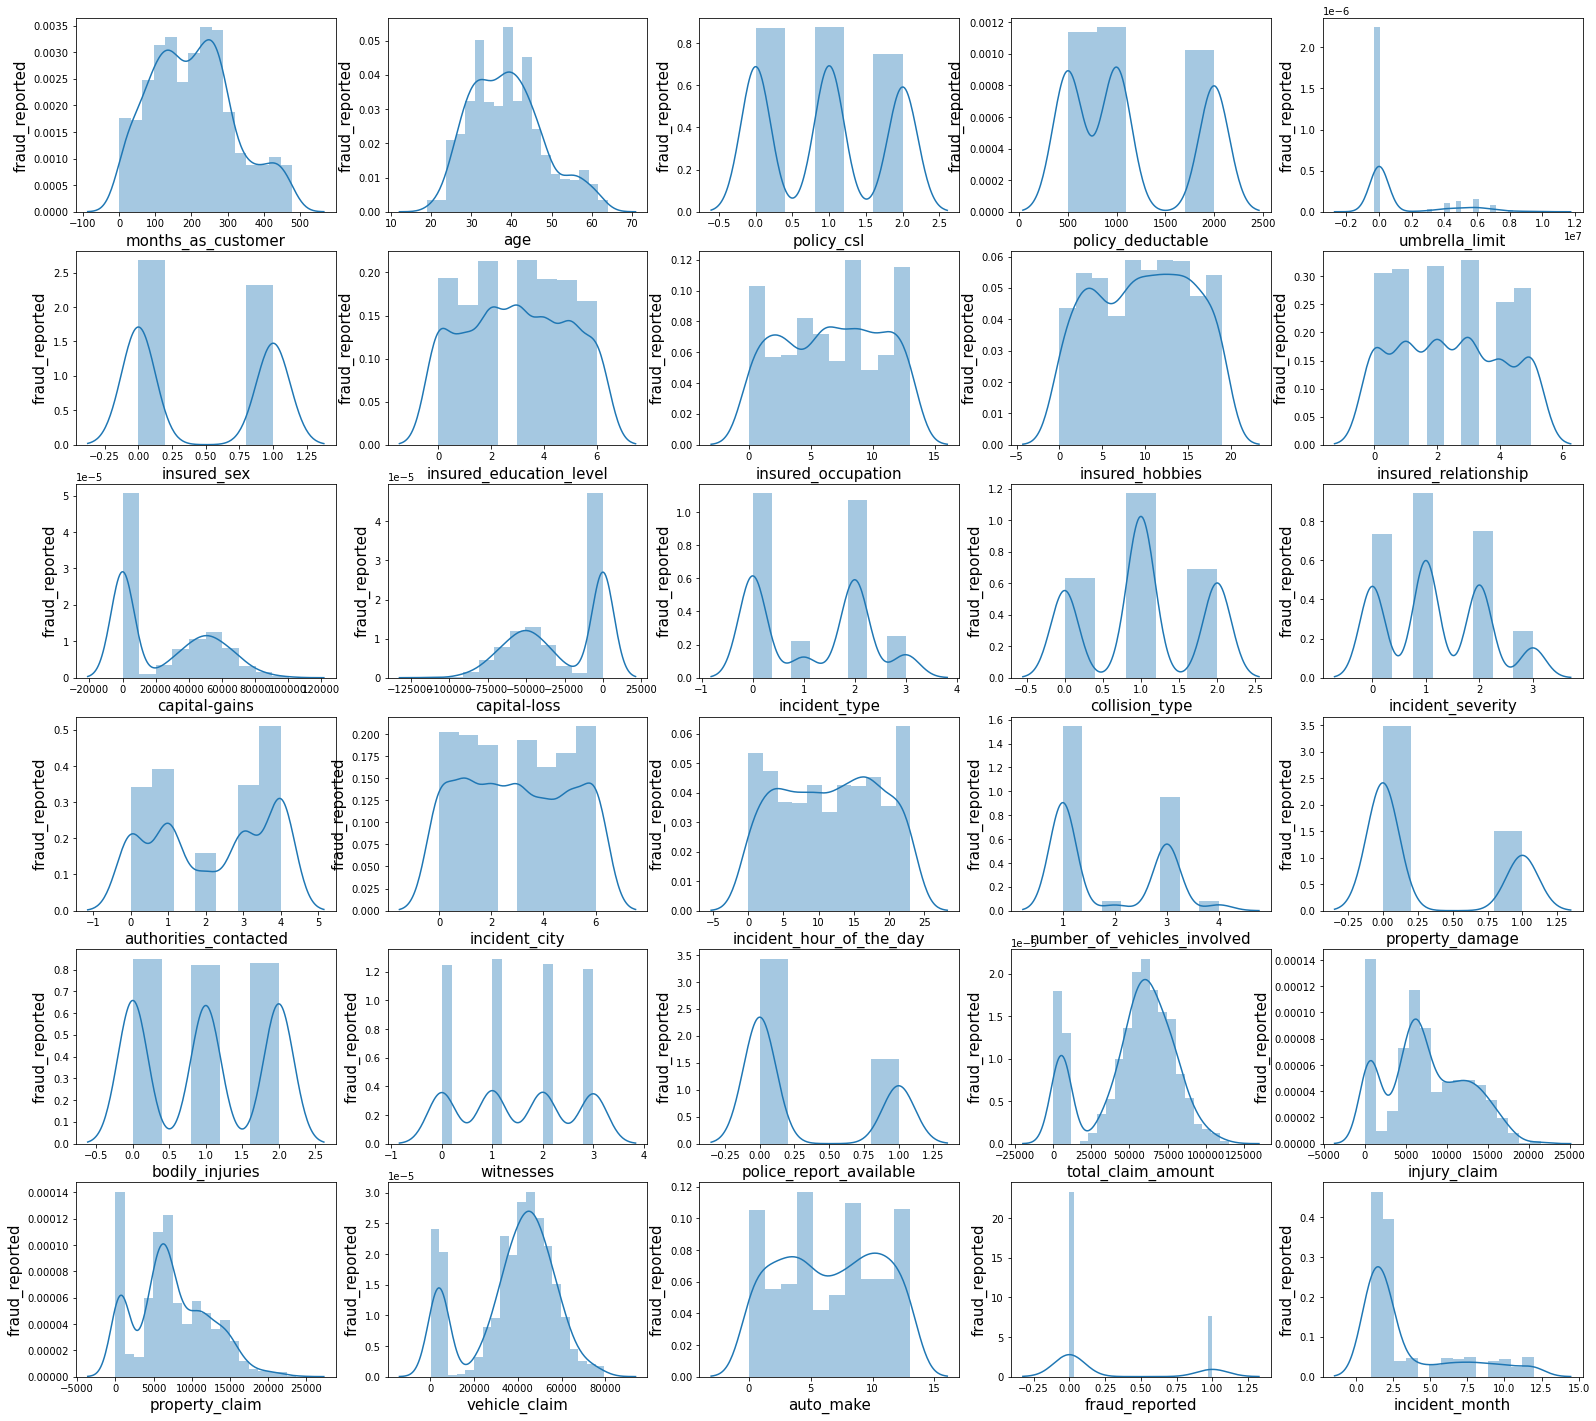

In [85]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,25))
pn = 1
for col in df:
    if pn <= 30:
        ax = plt.subplot(6,5,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('fraud_reported',fontsize = 15)
    pn +=1
plt.show()    

## Observations:-
### most of the features are having categorical values and umbrella_limit and capital_loss  are showing outliers 

### Checking Outliers

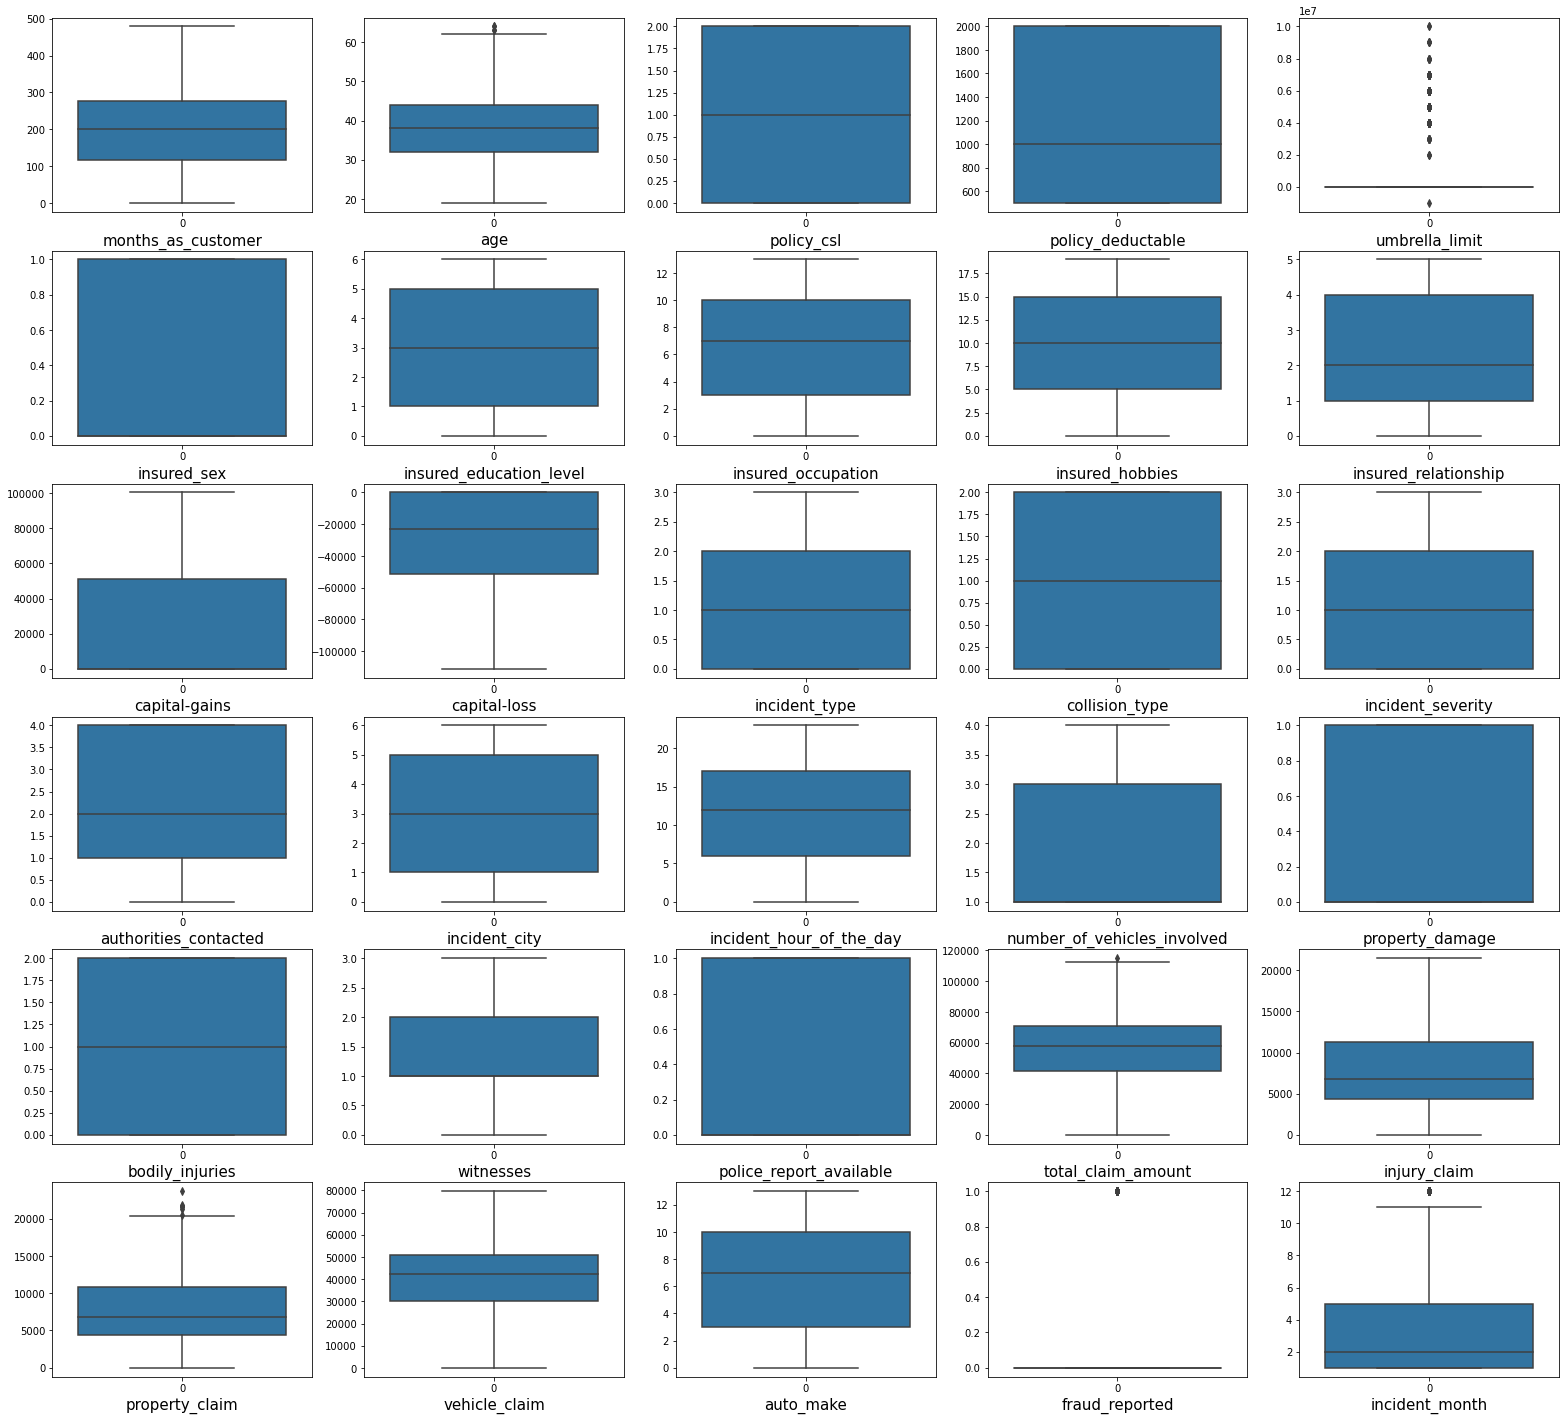

In [86]:
plt.figure(figsize=(27,25))
pn = 1
for col in df:
    if pn <= 30:
        ax = plt.subplot(6,5,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, umbrella_limit,age,property_claimand incident_month features are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [87]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 30)
Shape of the dataframe after removing outliers:  (983, 30)
Percentage of data loss post outlier removal:  1.7000000000000002


## Correlation

In [88]:
df.corr()

,months_as_customer,age,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported,incident_month
months_as_customer,1.000000,0.923026,-0.023499,0.032562,0.019391,0.060057,-0.000694,0.009362,-0.089586,0.069776,0.008022,0.024230,-0.015567,-0.071113,-0.062157,0.014540,-0.003923,0.068898,0.011515,0.001075,-0.004504,0.060949,-0.018030,0.059126,0.064235,0.036713,0.056660,0.047991,0.019849,0.019704
age,0.923026,1.000000,-0.014697,0.033355,0.014420,0.073287,0.001139,0.016749,-0.079258,0.074787,-0.004204,0.013076,-0.025090,-0.074704,-0.062701,0.019184,-0.004362,0.085993,0.020463,-0.006546,-0.009118,0.053604,-0.018498,0.069214,0.077335,0.063145,0.060647,0.031919,0.012371,0.019085
policy_csl,-0.023499,-0.014697,1.000000,0.008476,0.012801,-0.004630,0.007089,0.014162,-0.002969,-0.032516,0.009513,-0.037135,0.003757,0.026210,0.015459,0.049979,0.012294,0.001915,-0.013210,-0.025429,-0.000409,0.071959,-0.007084,-0.053359,-0.078606,-0.041611,-0.043628,-0.007321,-0.030156,-0.011765
policy_deductable,0.032562,0.033355,0.008476,1.000000,0.014168,-0.006005,0.014781,-0.051828,-0.002390,-0.020480,0.032001,-0.018133,-0.031221,-0.054390,-0.014914,0.003472,-0.045312,0.066495,0.045399,0.014060,-0.035307,0.070407,0.034941,0.023421,0.037335,0.070208,0.005214,-0.029341,0.014131,-0.009778
umbrella_limit,0.019391,0.014420,0.012801,0.014168,1.000000,0.018412,-0.031113,0.005139,-0.034057,0.095325,-0.022243,-0.024950,0.035142,0.009400,-0.000510,0.022530,0.040992,-0.020873,-0.040993,-0.082232,0.049334,-0.002879,-0.036739,-0.047098,-0.046689,-0.021101,-0.048364,0.012666,0.044336,0.028882
insured_sex,0.060057,0.073287,-0.004630,-0.006005,0.018412,1.000000,0.011628,-0.005399,-0.021120,0.002984,-0.018760,-0.026611,0.009650,-0.017669,-0.020026,0.019472,0.011711,0.014759,0.017596,0.033099,-0.014160,0.038960,0.012642,-0.019581,0.004808,-0.011133,-0.025788,0.020332,0.018767,0.035395
insured_education_level,-0.000694,0.001139,0.007089,0.014781,-0.031113,0.011628,1.000000,-0.024160,0.024205,-0.030569,0.043889,0.038404,0.007194,-0.020931,-0.009933,-0.014516,-0.021981,-0.053847,0.000785,-0.051212,-0.018609,0.023392,0.053036,0.077348,0.084777,0.059570,0.070995,0.057673,0.010369,0.070574
insured_occupation,0.009362,0.016749,0.014162,-0.051828,0.005139,-0.005399,-0.024160,1.000000,-0.010975,-0.014475,0.001262,-0.013242,0.005097,0.014742,0.001768,-0.000067,0.006289,-0.018203,-0.016845,-0.019209,0.002840,-0.018289,-0.026415,0.007067,0.022443,0.008669,0.001857,0.042490,-0.002201,0.014095
insured_hobbies,-0.089586,-0.079258,-0.002969,-0.002390,-0.034057,-0.021120,0.024205,-0.010975,1.000000,-0.094684,0.054792,-0.030115,0.011710,0.018990,-0.024619,-0.028763,0.019261,0.017096,0.008657,0.034038,0.026872,-0.037463,-0.033336,-0.002992,0.031291,0.011353,-0.015180,0.000702,-0.046697,-0.002358
insured_relationship,0.069776,0.074787,-0.032516,-0.020480,0.095325,0.002984,-0.030569,-0.014475,-0.094684,1.000000,-0.020458,-0.063968,0.025824,-0.009472,0.012873,-0.001604,-0.007237,0.003934,-0.042022,-0.038040,0.000071,-0.001590,-0.015532,0.004249,0.032372,0.007521,-0.004365,-0.027782,0.029521,0.043624


In [89]:
# let's check the correation with fraud_reported
df.corr()['fraud_reported'].sort_values()


incident_severity             -0.402730
insured_hobbies               -0.046697
authorities_contacted         -0.045145
incident_type                 -0.043072
incident_city                 -0.041063
policy_csl                    -0.030156
auto_make                     -0.028472
police_report_available       -0.020367
capital-loss                  -0.019421
collision_type                -0.019201
capital-gains                 -0.014713
insured_occupation            -0.002201
incident_hour_of_the_day       0.003022
insured_education_level        0.010369
age                            0.012371
policy_deductable              0.014131
insured_sex                    0.018767
months_as_customer             0.019849
incident_month                 0.021996
property_damage                0.025416
insured_relationship           0.029521
bodily_injuries                0.038257
umbrella_limit                 0.044336
number_of_vehicles_involved    0.046389
witnesses                      0.049028


### Checking correlation with fraud_reported


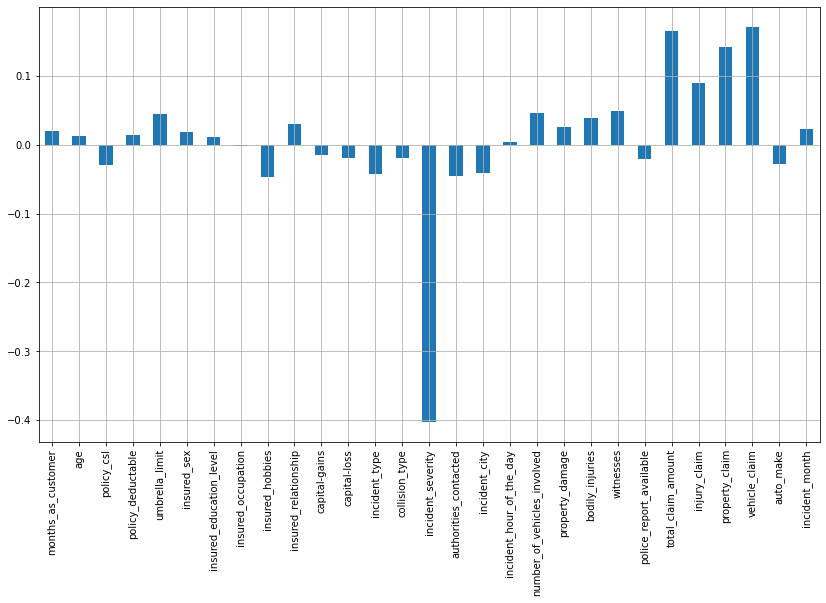

In [90]:
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

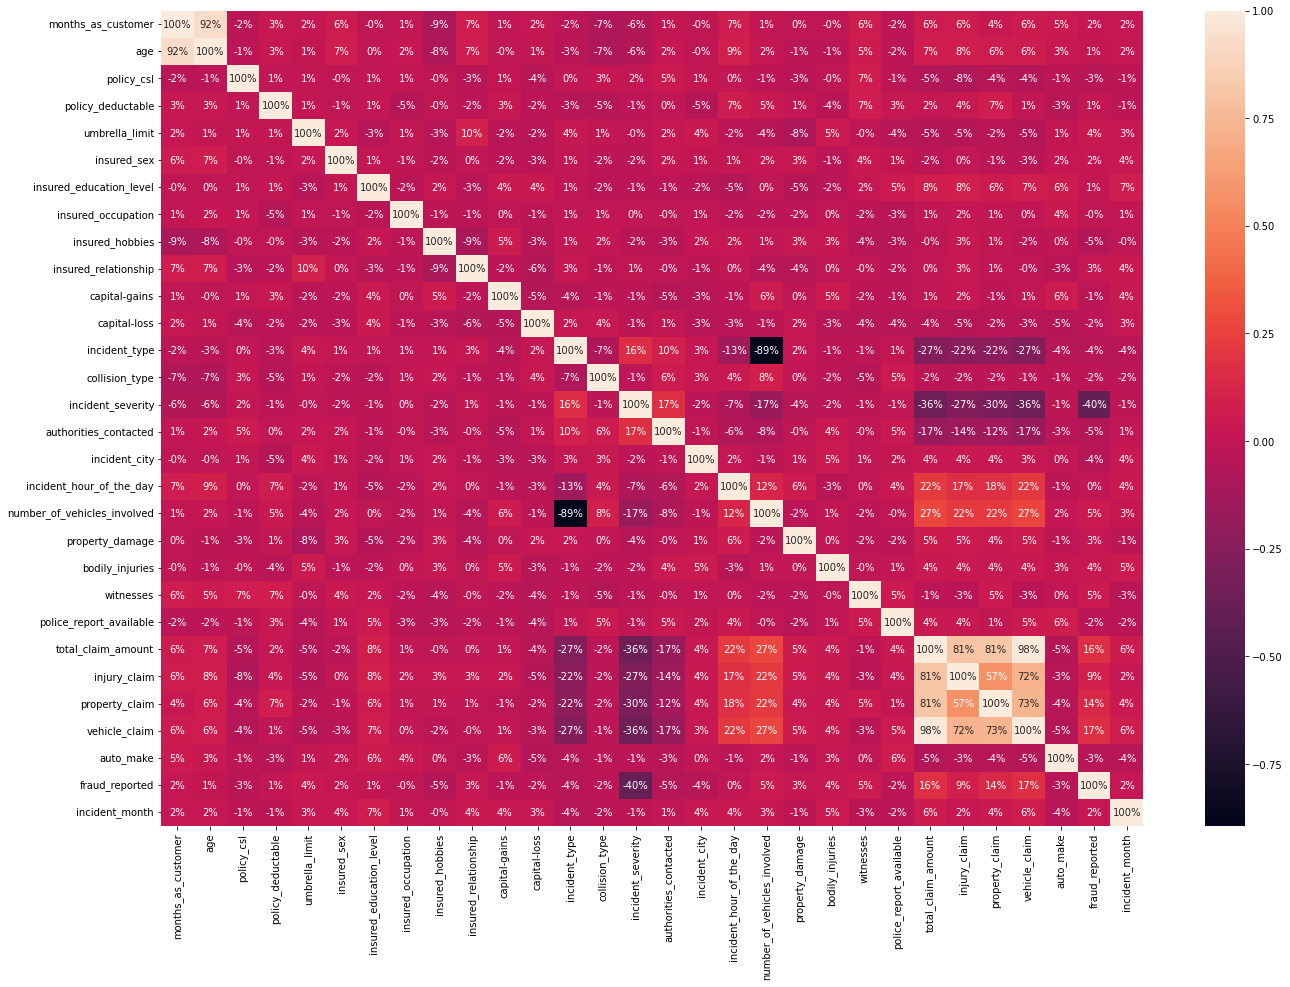

In [91]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- policy_csl,insured hobbies,capital_loss,capital_gain,incident_type,collision_type,incident_city,auto_make are negatively correlated with target.            
- months_as_customer,age,umbrella_limit,insured_occupation,insured_relationship,property_damage,witnesses,total_claim_amount, injury_claim,property_claim , incident_month are positively correlated with target variable
- months_as_cutomer and age  are highly correlated.
- injury_claim,property_claim and vehicle_claim are highly correlated with total_claim_amount
- maximum correlation : vehicle_claim
- minimum correlation : insured_occupation                              


In [92]:
df.drop(columns=['total_claim_amount','age'],inplace=True)

In [93]:
df.drop(columns=['number_of_vehicles_involved'],inplace=True)

In [94]:
df.drop(columns=['property_claim'],inplace=True)

### Skewness

In [95]:
df.skew()

months_as_customer          0.366978
policy_csl                  0.096017
policy_deductable           0.479334
umbrella_limit              1.806345
insured_sex                 0.140949
insured_education_level     0.004804
insured_occupation         -0.052521
insured_hobbies            -0.061328
insured_relationship        0.078645
capital-gains               0.469129
capital-loss               -0.373733
incident_type               0.091084
collision_type             -0.031080
incident_severity           0.280436
authorities_contacted      -0.113368
incident_city               0.048398
incident_hour_of_the_day   -0.034313
property_damage             0.857869
bodily_injuries             0.009371
witnesses                   0.021612
police_report_available     0.795943
injury_claim                0.268686
vehicle_claim              -0.620758
auto_make                  -0.029757
fraud_reported              1.186563
incident_month              1.385655
dtype: float64

## Dividing data in features and label

In [96]:
x = df.drop('fraud_reported',axis = 1)
x.head()

,months_as_customer,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,vehicle_claim,auto_make,incident_month
0,328,1,1000,0,1,4,2,17,0,53300,0,2,2,0,4,1,5,1,1,2,1,6510,52080,10,1
1,228,1,2000,5000000,1,4,6,15,2,0,0,3,1,1,4,5,8,0,0,0,0,780,3510,8,1
2,134,0,2000,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,7,0,2,3,0,7700,23100,4,2
3,256,1,2000,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,0,5,0,1,2,0,6340,50720,3,10
4,228,2,1000,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,0,20,0,0,1,0,1300,4550,0,2


In [97]:
y=df['fraud_reported']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [98]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,months_as_customer,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_city,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,vehicle_claim,auto_make,incident_month
0,1.047009,0.186374,0.064897,-0.336348,1.072840,0.571373,-1.149426,1.223537,-1.566754,1.028483,1.049422,0.820390,1.315469,-1.369236,1.158366,-0.938265,-0.911620,1.516132,0.101236,0.519374,1.473420,0.007764,0.758101,0.853583,-1.100681
1,0.302212,0.186374,1.273550,1.484887,1.072840,0.571373,-0.083109,0.916824,-0.150307,-0.987648,1.049422,1.443660,0.008423,-0.065003,1.158366,0.980273,-0.442088,-0.659573,-1.261059,-1.408033,-0.678693,-1.521992,-1.786107,0.411150,-1.100681
2,-0.512716,-1.233895,1.273550,1.484887,-0.932106,1.459389,1.058711,-1.402089,0.418148,0.954363,1.049422,-1.130438,0.008423,-0.065003,1.158366,-0.938265,-0.593454,-0.659573,1.179164,1.290060,-0.678693,0.225227,-0.818921,-0.564038,-0.022491
3,0.520553,0.186374,1.273550,1.791188,-0.932106,1.459389,-1.460946,-1.402089,0.937596,1.013216,-1.005346,0.820390,-1.436305,-1.369236,1.158366,-1.602742,-0.911620,-0.659573,0.101236,0.519374,-0.678693,-0.024676,0.681887,-0.836575,1.556677
4,0.302212,1.233429,0.064897,1.791188,1.072840,-1.627439,1.058711,-1.402089,0.937596,1.066306,-0.940572,1.443660,0.008423,-0.065003,-0.032668,-1.602742,1.146310,-0.659573,-1.261059,-0.352548,-0.678693,-1.300544,-1.739449,-1.811112,-0.022491
5,0.520553,0.186374,0.064897,-0.336348,-0.932106,1.459389,1.272177,-1.185796,0.937596,-0.987648,1.049422,-1.130438,0.008423,-1.369236,-0.706649,-1.602742,1.025023,-0.659573,-1.261059,0.519374,-0.678693,-0.011272,0.713248,0.853583,-0.022491
6,-0.484115,0.186374,0.064897,-0.336348,1.072840,1.459389,0.618692,-1.402089,-1.566754,-0.987648,-1.050299,-1.130438,-1.436305,-0.065003,1.158366,1.377575,-1.889462,-0.659573,-1.261059,-1.408033,-0.678693,2.106362,0.644406,0.635260,-1.100681
7,-0.226835,-1.233895,0.064897,-0.336348,1.072840,-1.627439,1.272177,-1.896040,0.937596,-0.987648,1.049422,-1.130438,-1.436305,0.896697,1.158366,-0.938265,1.501822,-0.659573,1.179164,0.519374,1.473420,0.508581,-0.302078,-1.445965,-0.022491
8,-1.784531,-1.233895,-1.215338,-0.336348,-0.932106,1.459389,0.157456,-0.060678,0.418148,-0.987648,1.049422,0.820390,-1.436305,0.896697,1.158366,-1.602742,1.266152,-0.659573,0.101236,-0.352548,1.473420,-0.830112,-0.867958,1.275376,-1.100681
9,0.173265,-1.233895,-1.215338,-0.336348,1.072840,1.459389,0.391075,-0.981062,1.421056,-0.987648,-0.907327,0.820390,0.008423,0.896697,0.582892,-0.384368,0.393312,-0.659573,1.179164,-0.352548,-0.678693,-0.359882,-0.298305,0.853583,1.061064


In [99]:
pd.DataFrame(x).skew().sort_values()

umbrella_limit             -7.953468
vehicle_claim              -0.522728
injury_claim               -0.416931
incident_hour_of_the_day   -0.256701
insured_hobbies            -0.248001
insured_occupation         -0.237539
auto_make                  -0.230790
authorities_contacted      -0.223352
insured_education_level    -0.187982
incident_city              -0.180556
insured_relationship       -0.159883
witnesses                  -0.153176
months_as_customer         -0.132755
bodily_injuries            -0.131397
collision_type             -0.128523
policy_csl                 -0.097888
incident_type              -0.095475
incident_severity          -0.078970
policy_deductable           0.022697
capital-gains               0.029301
capital-loss                0.090459
insured_sex                 0.140949
incident_month              0.306338
police_report_available     0.795943
property_damage             0.857869
dtype: float64

### Every value will be reduced after transformation

In [100]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 1.04700872,  0.18637373,  0.06489705, ...,  0.75810138,
         0.85358307, -1.10068072],
       [ 0.30221178,  0.18637373,  1.27355029, ..., -1.78610712,
         0.41114974, -1.10068072],
       [-0.51271611, -1.23389494,  1.27355029, ..., -0.81892079,
        -0.56403794, -0.02249109],
       ...,
       [-0.55119822,  0.18637373, -1.21533776, ...,  0.78167344,
         1.06677691, -1.10068072],
       [ 1.90505975,  1.23342941,  1.27355029, ..., -0.10119437,
        -1.44596456, -0.02249109],
       [ 1.8925613 ,  0.18637373,  0.06489705, ..., -1.77855437,
         0.41114974, -0.02249109]])

## Final features Multi-Collinearity Check using VIF**


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,months_as_customer,1.036003
1,policy_csl,1.022203
2,policy_deductable,1.030893
3,umbrella_limit,1.034243
4,insured_sex,1.015871
5,insured_education_level,1.038087
6,insured_occupation,1.010390
7,insured_hobbies,1.035639
8,insured_relationship,1.029230
9,capital-gains,1.027798


### There is no sign of Multi-collinearity


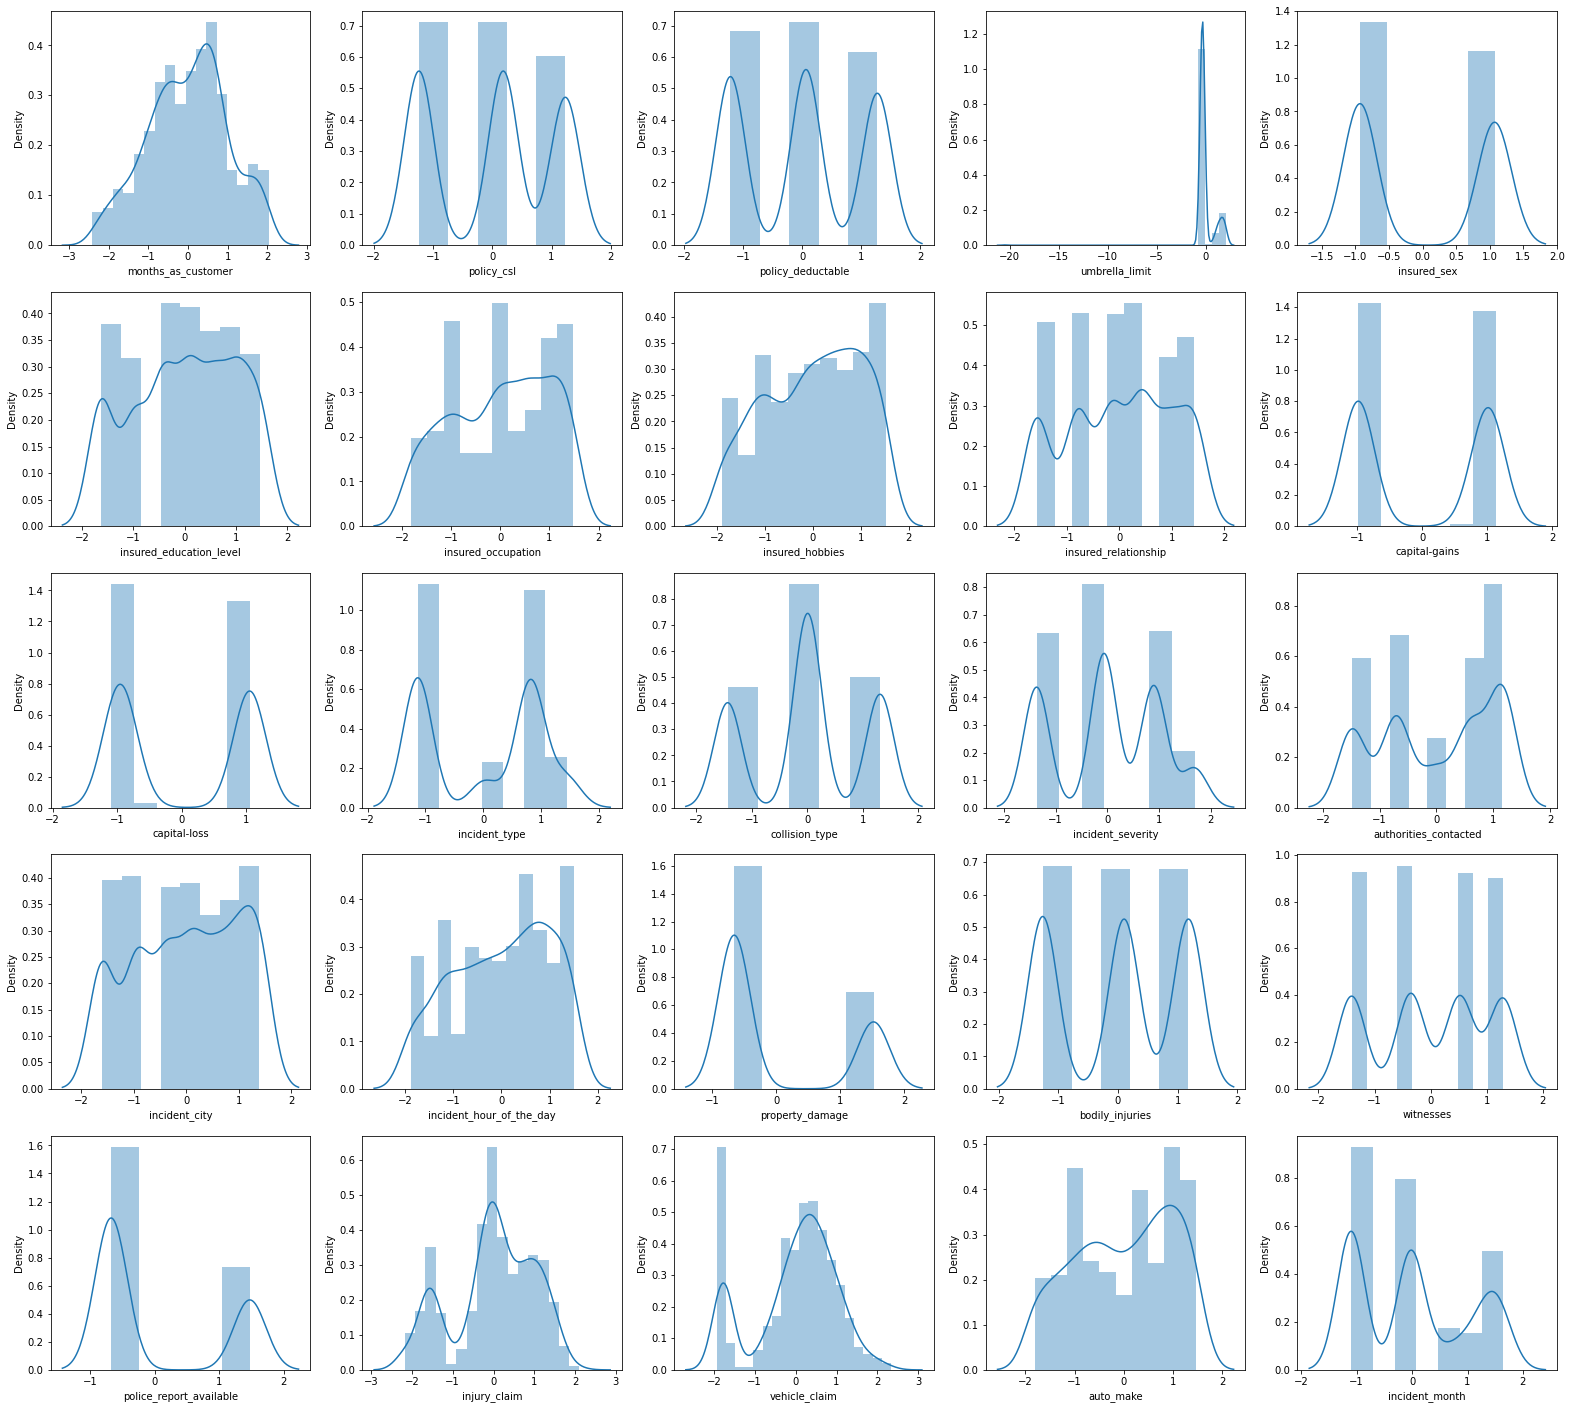

In [102]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(27,25))
plotnumber=1
for column in x:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model Building


In [77]:
# lets import all necessary libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [92]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    pred = dt.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.8578680203045685 on Random State 123


In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [90]:
# classification model Function
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 123)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x,y,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)

    # Confusion_matrix
    plt.figure(figsize=(4,3))
    print("\n\n",sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt = "d",linecolor="k",linewidths=3))
    plt.title("CONFUSION MATRIX",fontsize=14)
    plt.show()

## Logistic regression


Accuracy score 85.78680203045685

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       150
           1       0.85      0.49      0.62        47

    accuracy                           0.86       197
   macro avg       0.86      0.73      0.77       197
weighted avg       0.86      0.86      0.84       197

Cross validation score 78.74281274281275

 Accuracy score - cross val score is: 7.043989287644109


 AxesSubplot(0.125,0.125;0.62x0.755)


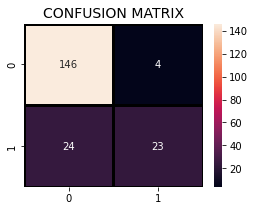

In [82]:
model=LogisticRegression()
classify(model,x,y)

### After setting the random state = 266 , We got the accuracy score is 85%


## KNN

Accuracy score 79.69543147208121

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       161
           1       0.41      0.25      0.31        36

    accuracy                           0.80       197
   macro avg       0.63      0.58      0.60       197
weighted avg       0.77      0.80      0.78       197

Cross validation score 72.74281274281275

 Accuracy score - cross val score is: 6.952618729268465


 AxesSubplot(0.125,0.125;0.62x0.755)


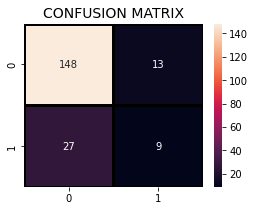

In [85]:
model = KNeighborsClassifier()
classify(model,x,y)

### After setting the random state = 174 , We got the accuracy score is 79%


## Random Forest


Accuracy score 82.23350253807106

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       159
           1       0.56      0.37      0.44        38

    accuracy                           0.82       197
   macro avg       0.71      0.65      0.67       197
weighted avg       0.80      0.82      0.81       197

Cross validation score 77.00699300699303

 Accuracy score - cross val score is: 5.226509531078037


 AxesSubplot(0.125,0.125;0.62x0.755)


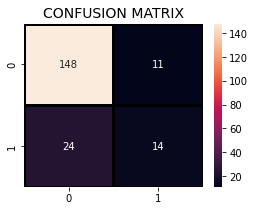

In [88]:
model =RandomForestClassifier()
classify(model,x,y)

### After setting the random state = 453 , We got the accuracy score is 82%


## AdaBoost

Accuracy score 87.30964467005076

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       156
           1       0.72      0.63      0.68        41

    accuracy                           0.87       197
   macro avg       0.81      0.79      0.80       197
weighted avg       0.87      0.87      0.87       197

Cross validation score 79.7700077700078

 Accuracy score - cross val score is: 7.539636900042964


 AxesSubplot(0.125,0.125;0.62x0.755)


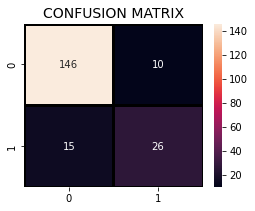

In [91]:
model=AdaBoostClassifier()
classify(model,x,y)

### After setting the random state = 123, We got the accuracy score is 87%


## Decision tree

Accuracy score 85.27918781725889

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       156
           1       0.63      0.71      0.67        41

    accuracy                           0.85       197
   macro avg       0.78      0.80      0.79       197
weighted avg       0.86      0.85      0.86       197

Cross validation score 77.93783993783995

 Accuracy score - cross val score is: 7.341347879418933


 AxesSubplot(0.125,0.125;0.62x0.755)


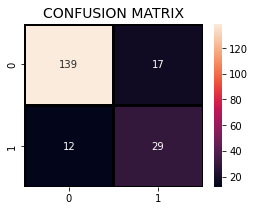

In [93]:
model=DecisionTreeClassifier()
classify(model,x,y)

### After setting the random state = 123 , We got the accuracy score is 85%


## Compare the models


In [94]:
# create a list of labels of build models
label = ['LogisticRegression','KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)

['LogisticRegression', 'KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[85.78680203045685, 79.69543147208121, 82.23350253807106, 87.30964467005076, 85.27918781725889]
[78.74281274281275, 72.74281274281275, 77.00699300699303, 79.7700077700078, 77.93783993783995]
[7.043989287644109, 6.952618729268465, 5.226509531078037, 7.539636900042964, 7.341347879418933]


In [95]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,LogisticRegression,85.786802,78.742813,7.043989
1,KNN,79.695431,72.742813,6.952619
2,Random Forest,82.233503,77.006993,5.226510
3,AdaBoost,87.309645,79.770008,7.539637
4,Decision Tree,85.279188,77.937840,7.341348


 ###  as per my observation , I choose RandomForest as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [96]:
rf= RandomForestClassifier()

In [97]:
params = {
    'n_estimators':[100],
    'n_jobs':[50,60],
    'max_depth':[15,19],
    'criterion':['entropy','gini'],
    'random_state':[30,40,50],
    'min_samples_leaf':[2,4,3]       }

In [98]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 19], 'min_samples_leaf': [2, 4, 3],
                         'n_estimators': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [99]:
rf = grd.best_estimator_
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_jobs=50,
                       random_state=40)

In [100]:
pred = rf.predict(X_test)
accuracy_score(Y_test,pred)

0.7411167512690355

## ROC AUC Curve

In [101]:
from sklearn.metrics import plot_roc_curve

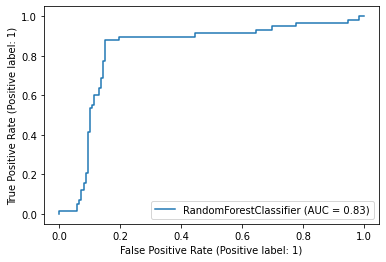

In [103]:
plot_roc_curve(rf,X_test,Y_test)
plt.show()

# save the final model


In [105]:
import joblib
joblib.dump(rf,'Insurance Claims- Fraud Detection.pkl')

['Insurance Claims- Fraud Detection.pkl']

## Model is completed